# This is the script for the plots, which occur in my Bachelor's thesis

## Header contains all the modules needed for this script

Attention: In order to be able to execute this script the file Methods_BA.py needs to be in the same directory as this jupyter notebook.
Additionally, the data for the observations are needed in the form I used them (SITELLE & LEGUS data).

This script is originally created in python 3.6.8

In [1]:
# header
# calculating
import numpy as np
from copy import deepcopy

# plotting
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.colors as colors

# machine learning
from sklearn.model_selection import train_test_split
from sklearn.svm import SVR
from sklearn.neural_network import MLPRegressor
from sklearn.preprocessing import StandardScaler, scale
from sklearn.preprocessing import Imputer
from sklearn.cluster import KMeans, DBSCAN
from sklearn.decomposition import PCA

# fitting 
from scipy.optimize import curve_fit
from scipy.odr import ODR, Model, Data, RealData # ODR is orthogonal distance regression -> allows to fit both in x and y direction
from scipy.stats import gaussian_kde

# pandas data visualization
import pandas as pd

from IPython.display import display

# extra container types
import collections as co
import csv

# self written methods/functions
import Methods_BA as ba
from Methods_BA import dir_legus_featurename_and_id, dir_sitelle_featurename_and_id

import sys

#%matplotlib notebook
%matplotlib inline

Define the plot style

In [2]:
# to set the default font used according to my font in latex which is arev
mpl.rcParams['text.latex.preamble'] = [
       r'\usepackage{siunitx}',   
       r'\sisetup{detect-all}',   # this to force siunitx to actually use your fonts
       r'\usepackage{arev}',      # set the normal font here
       r'\usepackage{sansmath}',  # load up the sansmath so that math -> arev
       r'\sansmath'               # <- tricky! -- gotta actually tell tex to use!
]

# to set the font size and dpi for the generating plots
mpl.rcParams.update({'font.size':11, 'figure.dpi':140})

specify the directory for the saving of the images, if plt.savefig(...) is uncommented

In [3]:
# the directory where the images will be saved
path = r'D:\enteryourdirectory'

If you run have the data and run the notebook the first time pls uncomment next cell

In [4]:
#path_of_data = r"D:\enteryourdirectory"
#data_legus = np.loadtxt(path_of_data+r"\hlsp_legus_hst_acs-wfc3_ngc628-c_multiband_v1_PadAGB-MWext-avgapcor.tab")
## sitele data structure is somewhat strange need to change the file in order to access data in a natrual way
#data_legus_dc = np.loadtxt(path_of_data+r"\hlsp_legus_hst_acs-wfc3_ngc628-e_multiband_v1_PadAGB-MWext-avgapcor.txt")
#data_sitele = np.loadtxt(path_of_data+"\sitele_ngc628_.dat")
#
## save the data as npy files and load them in the next cell
#np.save(path+'\sitele', data_sitele)
#np.save(path+'\legus_dc', data_legus_dc)
#np.save(path+'\legus', data_legus)

here the datasets are loaded - if you have the data specify the directory the data is in (variable '$\texttt{directory_datasets}$')

In [5]:
# load datasets
# specify the directory where the sitele.npy and legus.npy and legus_dc.npy is stored
directory_datasets = r'C:\Users\Rapha\OneDrive\Uni\Bachelor\Catalogs\Data'
data_sitele = np.load(directory_datasets+r'\sitele.npy')
SITELLE = deepcopy(data_sitele)
data_legus = np.load(directory_datasets+r'\legus.npy')
data_legus_dc = np.load(directory_datasets+r'\legus_dc.npy')

# sitele data
# right ascesion of sitele
r_asc_st = [i[1] for i in data_sitele]

# Declination of sitele
decl_st = [i[2] for i in data_sitele]

# legus data
# right ascesion of legus
r_asc_le = [i[3] for i in data_legus]
# Declination of legus
decl_le = [i[4] for i in data_legus]

# specific LEGUS centered corrdinates for later use
# right ascesion of legus
r_asc_le_c = [i[3] for i in data_legus]
# Declination of legus
decl_le_c = [i[4] for i in data_legus]

# legus data decentered
# right ascesion of legus
r_asc_le_dc = [i[3] for i in data_legus_dc]
# Declination of legus
decl_le_dc = [i[4] for i in data_legus_dc]
print(len(data_legus), len(data_legus_dc))

3080 593


First visualization of the data

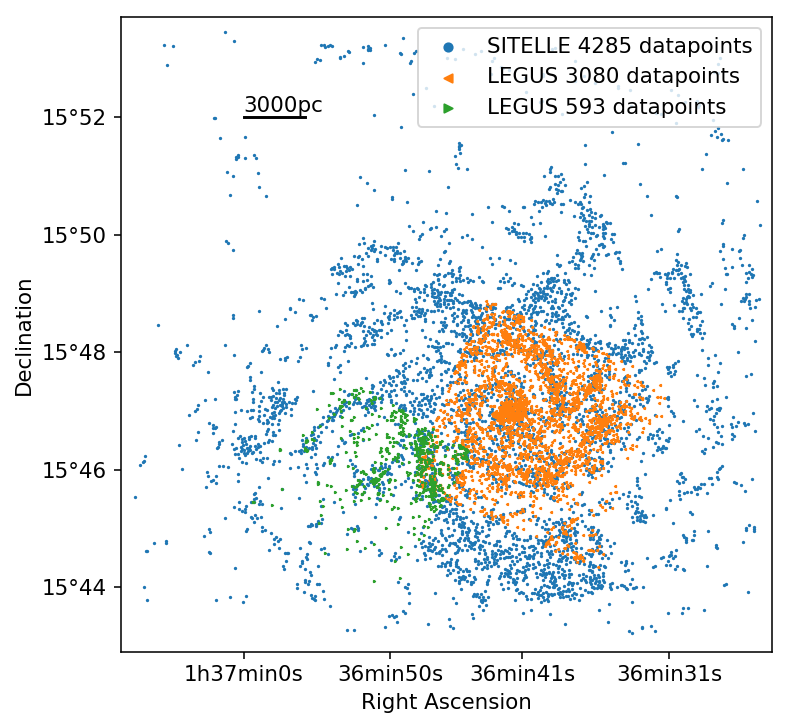

In [6]:
plt.figure(figsize=(6,6))
# marker size
s = 0.5

# the minus is needed for the right ascension
plt.scatter(-np.asarray(r_asc_st), decl_st, s=s,label='SITELLE {} datapoints'.format(len(data_sitele)))
plt.scatter(-np.asarray(r_asc_le), decl_le, s=s, marker='<', label='LEGUS {} datapoints'.format(len(data_legus)))
plt.scatter(-np.asarray(r_asc_le_dc), decl_le_dc, marker='>', s=s, label='LEGUS {} datapoints'.format(len(data_legus_dc)))
plt.xlabel('Right Ascension')
plt.ylabel('Declination')
plt.legend(loc='upper right', markerscale=6.)

locs_x, labels_x = plt.xticks()
locs_y, labels_y = plt.yticks()
labels_x, locs_x = ba.set_ticks_for_right_ascesion(locs_x[::2]+0.008,num_of_ticks=4, plus_or_minus=1)
labels_y, locs_y = ba.set_ticks_for_declination(locs_y[::2], num_of_ticks=6)
plt.yticks(locs_y, labels_y)
plt.xticks(locs_x, labels_x)
plt.xlim(-24.285, -24.1)
plt.ylim(15.715, 15.895)

# this includes the black bar to indicate distances in the plot
ba.scale_for_plot(3000,'black', 0, -1)

# uncomment in order to save figure
#plt.savefig(path + r'\data_visualization.png', dpi=200)
plt.show()

In the next cell the optimal distance threshold for the overlap region in the LEGUS will be figured out

Number of instances in LEGUS central region:  193 
Number of instances in LEGUS east region 219


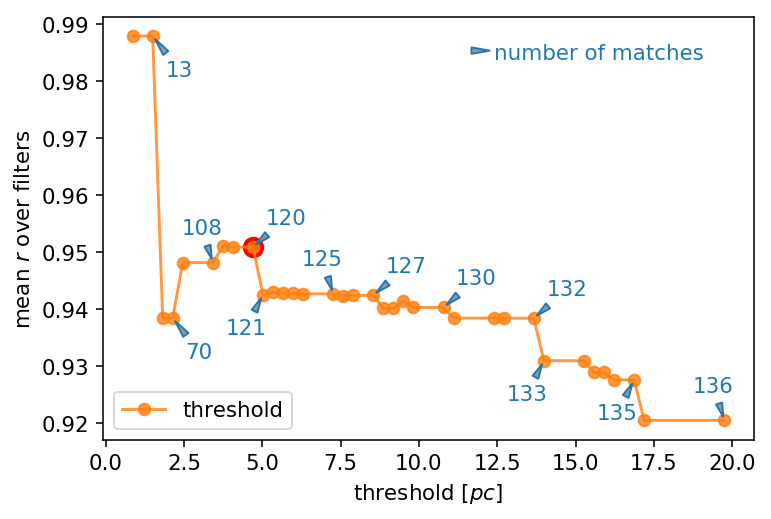

distant threshold in pc: 4.70459204946472 and in deg: 2.722760290556901e-05
mean r2 0.9509085126149559
number of matches:  120


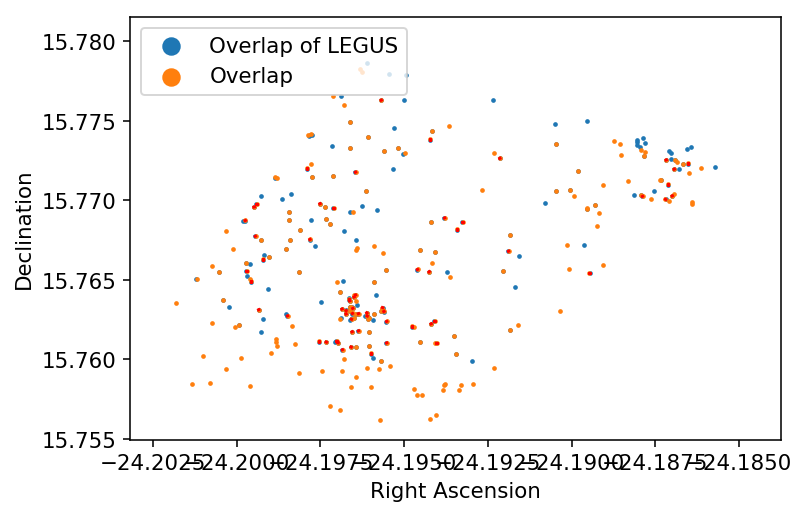

C:\Users\Rapha\OneDrive\Uni\Bachelor\Methodology\Methods_BA.py:85: RuntimeWarning: invalid value encountered in arccos
  res = np.arccos(np.sin(DEC1)*np.sin(DEC2)+np.cos(DEC1)*np.cos(DEC2)*np.cos(RA1-RA2))


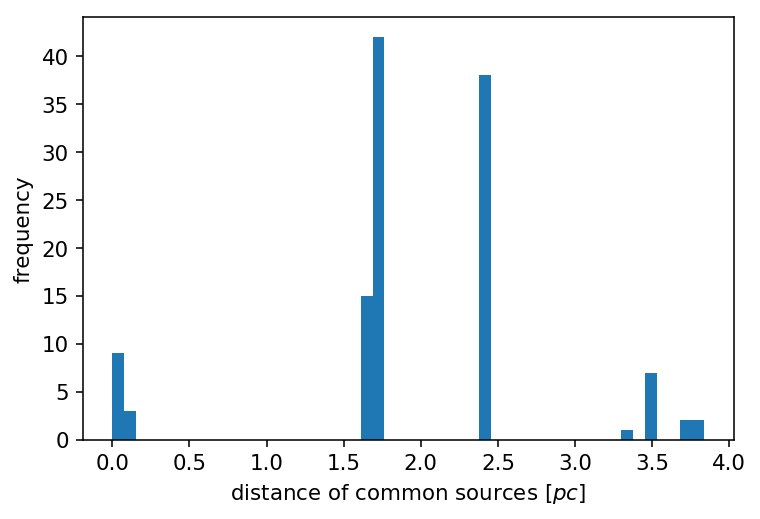

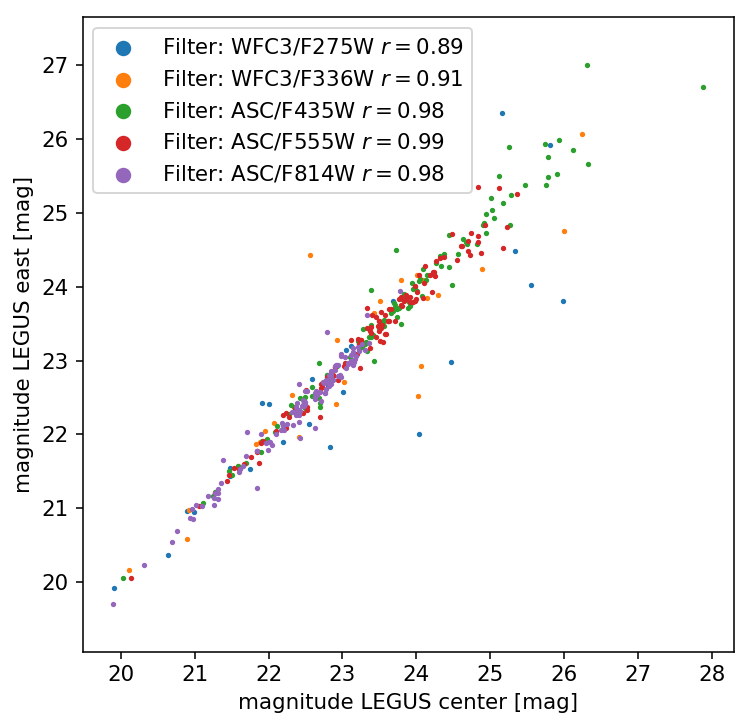

In [7]:
fac =1.00001 

# get the overlap of the eastern part of the LEGUS data with the center part
indices_LEGUS_dc = ba.get_indices_of_objects_in_FOV(r_asc_le, decl_le, r_asc_le_dc, decl_le_dc, tolerance_factor=fac)

# get the overlap of the center part of the LEGUS data with the eastern part
indices_LEGUS_c = ba.get_indices_of_objects_in_FOV(r_asc_le_dc, decl_le_dc, r_asc_le, decl_le, fac)

overlap_legus_c  = data_legus[indices_LEGUS_c]
overlap_legus_dc = data_legus_dc[indices_LEGUS_dc]

print('Number of instances in LEGUS central region: ', len(overlap_legus_c),'\nNumber of instances in LEGUS east region', len(overlap_legus_dc))

# right ascesion of legus overlap centered
r_asc_le_ov = overlap_legus_c[:,3]
# Declination of legus
decl_le_ov =  overlap_legus_c[:,4]

# right ascesion of legus overlap decentered (east)
r_asc_le_ov_dc = overlap_legus_dc[:,3]
# Declination of legus
decl_le_ov_dc =  overlap_legus_dc[:,4]

########################
# find the right threshold for the nearest neighbor alg
thresholds = np.linspace(0.000005, 0.0008/7, num=60) #np.linspace(0.000005, 0.00009, num=40)

filters = [5,7,9,11,13]#[22]# extinction#
num_matches, mean_r2 = ba.matches_against_r2(r_asc_le_ov, decl_le_ov, r_asc_le_ov_dc, decl_le_ov_dc, thresholds, filters, overlap_legus_c, overlap_legus_dc)

num_matches = np.asarray(num_matches)
mean_r2 = np.asarray(mean_r2)

idx_keep = [0]
for i in range(1,len(mean_r2)-1):
    if mean_r2[i-1] == mean_r2[i+1]:
        continue
    else:
        idx_keep.append(i)

idx_keep.append(len(mean_r2)-1)
mean_r2 = mean_r2[idx_keep]
thresholds = thresholds[idx_keep]
num_matches = num_matches[idx_keep]
idx = np.argmax(mean_r2[int(len(mean_r2)/8):])+int(len(mean_r2)/8)+2
fig = plt.figure()
ax2 = fig.add_subplot(111)

DR = [-0.007, 0.4]
UL = [0.005, -1]
UR = [0.004, 0.4]
DL = [-0.007, -1.2]
points_with_arrows = [1,3,5,8,9,14,17,22,26,27,32,34]
directions = {1:DR, 3:DR, 5:UL, 8:UR, 9:DL, 14:UL, 17:UR, 22:UR, 26:UR, 27:DL, 32:DL, 34:UL}
for i in range(1,len(num_matches)):
    if i in points_with_arrows:
        offset, x_offset = directions[i]
        ax2.annotate('{}'.format(num_matches[i]), color='C0', arrowprops=dict(arrowstyle="wedge", fc='0.6', ec="C0"), xy=(ba.calculate_distance(thresholds[i], 9.9e6), mean_r2[i]), xytext=(ba.calculate_distance(thresholds[i], 9.9e6)+x_offset, mean_r2[i]+offset))
p2 = ax2.plot(ba.calculate_distance(thresholds, 9.9e6)[idx], mean_r2[idx], marker='o', color='red', markersize=10)
l2 = ax2.plot(ba.calculate_distance(thresholds, 9.9e6), mean_r2, label='threshold', marker='o', color='C1', alpha=0.8)
#ax1.set_xlabel('number of matches')
ax2.annotate('number of matches', color='C0', xy=(0.6,0.9), xycoords='axes fraction')
ax2.annotate('', color='C0', xy=(0.6,0.92), xycoords='axes fraction', xytext=(0.56,0.92), textcoords='axes fraction', arrowprops=dict(arrowstyle="wedge", fc='0.6', ec="C0"))
ax2.set_ylabel('mean $r$ over filters')
ax2.set_xlabel(r"threshold $[pc]$")
ax2.legend(loc='lower left')

# uncomment in order to save figure
#plt.savefig('num_of_matches_overlapregion', dpi=200)
plt.show()
########################

threshold = thresholds[idx]#0.00003
print('distant threshold in pc:', ba.calculate_distance(threshold, 9.9e6), 'and in deg:', threshold)

plt.scatter(-r_asc_le_ov, decl_le_ov, s=2, label='Overlap of LEGUS')
plt.scatter(-r_asc_le_ov_dc, decl_le_ov_dc, s=2, label='Overlap')

a = ba.Nearest_Neighbor([-r_asc_le_ov, decl_le_ov], [-r_asc_le_ov_dc, decl_le_ov_dc], double_use=False, axis=1, threshhold=threshold)
ba.Visualize_Nearest_Neighbors(a, -r_asc_le_ov, decl_le_ov, -r_asc_le_ov_dc, decl_le_ov_dc)
print('mean r2', mean_r2[idx])
print('number of matches: ', len(a))

plt.xlabel('Right Ascension')
plt.ylabel('Declination')
plt.legend(loc='upper left', markerscale=6.)
plt.show()

# get the distribution of the ofsets of the common sources
a = np.asarray(a)

angles = ba.calculate_angle(r_asc_le_ov[a[:,0]], decl_le_ov[a[:,0]], r_asc_le_ov_dc[a[:,1]], decl_le_ov_dc[a[:,1]])
distances = ba.calculate_distance(angles, dist = 9.9e6)
plt.xlabel('distance of common sources $[pc]$')
plt.ylabel('frequency')
plt.hist(distances[np.isfinite(distances)], 50)

# look at the 'quallity' of the matching of the overlap
plt.figure(figsize = (6.,6.))
plt.axis('equal')

# interesstingly the correlation with the extinction is really bad for the 'same' source
for f in filters:
    mag_c = overlap_legus_c[a[:,0]][:,f]
    mag_dc = overlap_legus_dc[a[:,1]][:,f]
    mask1 = np.asarray(mag_c < 30) #(mag_c > 0)#
    mask2 = np.asarray(mag_dc < 30)#(mag_c > 0)#
    mask = np.asarray(mask1.astype(int)+mask2.astype(int) > 1)
    mag_c = mag_c[mask]
    mag_dc = mag_dc[mask]
    r2 = ba.calculate_correlation(mag_c, mag_dc)
    plt.scatter(mag_c, mag_dc, s=3,label='Filter: '+dir_legus_featurename_and_id[f][19:]+' $r={:.2f}$'.format(r2))

plt.legend(loc='best', markerscale=4)
plt.xlabel('magnitude LEGUS center [mag]')
plt.ylabel('magnitude LEGUS east [mag]')

# uncomment in order to save figure
#plt.savefig('mag_correlation_overlapregion',dpi=200)
plt.show()

# number of matches 116
redundant_legus = overlap_legus_dc[a[:,1]][:,0]

In [8]:
# leave out redundant data 
mask = np.ones(len(data_legus_dc)).astype(bool)
for i in range(len(mask)):
    if i in (redundant_legus-1):
        mask[i] = False

#mask = (redundant_legus).astype(int)
data_legus_dc = data_legus_dc[mask]

# quick check if the mask was working right
for i in range(len(redundant_legus)):
    if redundant_legus[i] in data_legus_dc[:,0]:
        print('Error')

# join the two Legus datasets and give them ongoing IDs
data_legus_dc[:,0] = data_legus_dc[:,0]+3080
data_legus = np.append(data_legus, data_legus_dc, axis=0)
# here the joined LEGUS data will be saved
np.savetxt('data_LEGUS_FOV.csv', data_legus, delimiter=',')
np.save('data_LEGUS_FOV.npy', data_legus)
LEGUS = deepcopy(data_legus)

# sitele data
# right ascesion of sitele
r_asc_st = [i[1] for i in data_sitele]

# Declination of sitele
decl_st = [i[2] for i in data_sitele]

# legus data
# right ascesion of legus
r_asc_le = [i[3] for i in data_legus]
# Declination of legus
decl_le = [i[4] for i in data_legus]

features_sitele = np.array([r_asc_st,decl_st])
features_legus = np.array([r_asc_le,decl_le])
print('length of the LEGUS data',len(data_legus))

length of the LEGUS data 3553


# Caution:

Since the resolution/pixel scale of SITELLE is 35pc we allow an error for the HII-region sizes/radii of 35pc

In [9]:
data_sitele_enlarged = deepcopy(SITELLE)
data_sitele_enlarged[:,12] += 35

for i in range(len(data_sitele[0])):
    if i != 12:
        np.testing.assert_array_equal(data_sitele_enlarged[:,i], data_sitele[:,i])
print('Now SITELLE data radii are enlarged by 35pc')

data_sitele = deepcopy(data_sitele_enlarged)
#data_sitele = SITELLE # this will undo the enlarging of the HII-regions

Now SITELLE data radii are enlarged by 35pc


1860


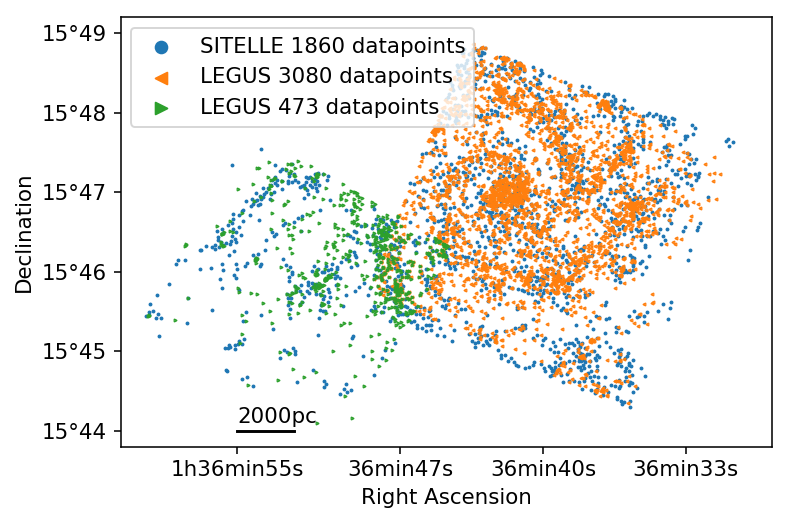

In [10]:
fac =1.00001 
indices_of_sitelle_data_in_FOV_of_LEGUSc = ba.get_indices_of_objects_in_FOV(r_asc_le_c, decl_le_c, r_asc_st, decl_st, tolerance_factor=fac)
indices_of_sitelle_data_in_FOV_of_LEGUSd = ba.get_indices_of_objects_in_FOV(r_asc_le_dc, decl_le_dc, r_asc_st, decl_st,tolerance_factor=fac)

mask_FOV = np.unique(np.append(indices_of_sitelle_data_in_FOV_of_LEGUSc, indices_of_sitelle_data_in_FOV_of_LEGUSd, axis=0))
print(len(mask_FOV))
data_sitele_FOV = data_sitele[mask_FOV]
np.savetxt('data_SITELLE_FOV.csv', data_sitele_FOV, delimiter=',')
np.save('data_SITELLE_FOV.npy', data_sitele_FOV)

# sitele data
# right ascesion of sitele
r_asc_st_FOV = [i[1] for i in data_sitele_FOV]

# Declination of sitele
decl_st_FOV = [i[2] for i in data_sitele_FOV]

# set figure size and boundary
x_lower, x_upper = -24.253, -24.12
y_lower, y_upper = 15.73, 15.82
diff = abs(x_upper -x_lower)
diff2 = y_upper - y_lower
plt.figure(figsize=(6,6*diff2/diff))
s = 1

plt.scatter(-np.asarray(r_asc_st_FOV), decl_st_FOV, s=s,label='SITELLE {} datapoints'.format(len(data_sitele_FOV)))
plt.scatter(-np.asarray(r_asc_le_c), decl_le_c, s=s, marker='<', label='LEGUS {} datapoints'.format(3080))
plt.scatter(-np.asarray(r_asc_le_dc), decl_le_dc, marker='>', s=s, label='LEGUS {} datapoints'.format(len(data_legus_dc)))
plt.xlabel('Right Ascension')
plt.ylabel('Declination')
plt.legend(loc='upper left', markerscale=6.)

locs_x, labels_x = plt.xticks()
locs_y, labels_y = plt.yticks()
labels_x, locs_x = ba.set_ticks_for_right_ascesion(locs_x[::2],num_of_ticks=3, plus_or_minus=1)
labels_y, locs_y = ba.set_ticks_for_declination(locs_y[::2], num_of_ticks=6)
loc_y_new = (locs_y[-1]-locs_y[-2])+locs_y[-1]
locs_y.append(loc_y_new)
labels_y.append('15°49')

loc_x_new = (locs_x[-1]-locs_x[-2])+locs_x[-1]
locs_x.append(loc_x_new)
labels_x.append('36min33s')

plt.yticks(locs_y, labels_y)
plt.xticks(locs_x, labels_x)
plt.xlim(x_lower, x_upper)
plt.ylim(y_lower, y_upper)

# this includes the black bar to indicate distances in the plot
ba.scale_for_plot(2000,'black', 0, 0)

#plt.savefig(path+r'\data_visualization_FOV.png', dpi=200)
plt.show()

In the cell below the distribution of the number of clusters within one HII-region will be visualized

Number of unique star clusters embedded in an HII-region:
 2223 (fraction of total: 0.6256684491978609 ) 
Number of star clusters in HII-regions (accounted multiple times if one star cluster lies in two HII-regions):
 3281 (fraction of total: 0.9234449760765551 )
Number of HII-regions containing at least one starcluster:
 1063 (fraction of total: 0.24807467911318554 )
Number of HII-regions in LEGUS FOV without star cluster:
 797


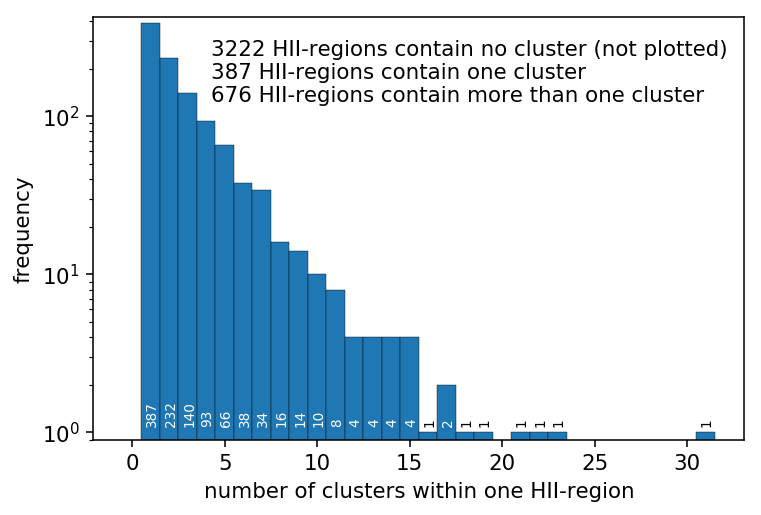

In [11]:
# load which clusters are embedded within which HII-region on whole dataset
dic = ba.clusters_embedded_in_HII_region(data_sitele, data_legus, save_positional_index=True)

# here after the legus data only countains those star clusters which are the only ones embedded within a HII-region
# this is indicated with an r at the end of the data array
data_sitele_r, data_legus_r = ba.reduce_dic_to_n_embedded(1, dic, data_sitele, data_legus, save_positional_index=True)

a = ba.create_matching_for_embedded(data_sitele_r, data_legus_r)

clusters = []
for i in range(len(dic)):
    values = dic[i]
    for value in values:
        clusters.append(value)

# Some additional information about the matching numbers
print('Number of unique star clusters embedded in an HII-region:\n', len(np.unique(clusters)), '(fraction of total:',len(np.unique(clusters))/len(data_legus),')' , '\nNumber of star clusters in HII-regions (accounted multiple times if one star cluster lies in two HII-regions):\n',np.sum([len(v) for v in dic.values()]), '(fraction of total:',np.sum([len(v) for v in dic.values()])/len(data_legus) ,')')
print('Number of HII-regions containing at least one starcluster:\n',np.sum([len(v)>=1 for v in dic.values()]),'(fraction of total:',np.sum([len(v)>=1 for v in dic.values()])/len(data_sitele),')')

ba.make_frequency_plot_for_num_of_clusters_in_HII_regions(dic, None, plot=False)
clusters = [len(v) for v in dic.values()]
bins = np.bincount(np.trim_zeros(np.sort(clusters)))
plt.annotate('{} HII-regions contain no cluster (not plotted)\n{} HII-regions contain one cluster\n{} HII-regions contain more than one cluster'.format(len(clusters)-np.count_nonzero(clusters),bins[1],np.sum(bins[2:])), xy = (0.18,0.8), xycoords='axes fraction')
for x in np.unique(clusters):
    if bins[x] == 0:
        continue
    else:
        if bins[x] == 1:
            plt.text(x-0.3, 1.1,'{}'.format(bins[x]), color='black', rotation = 90, size=7, va='bottom')
        else:
            plt.text(x-0.3, 1.1,'{}'.format(bins[x]), color='white', rotation = 90, size=7, va='bottom')

# Further additional information about the matching numbers
print('Number of HII-regions in LEGUS FOV without star cluster:\n', len(data_sitele_FOV)-np.sum([len(v)>=1 for v in dic.values()]))
plt.ylim(0.9,425)
plt.yscale('log')

#plt.savefig('frequency_of_number_of_clusters_in_HII_regions.png', dpi=240)
plt.show()

Investigation if HII-regions without clusters are attached with a higher extinction

shape legus (3553, 35)
shape legus red (2231, 35)
shape legus_red_class (2231, 35)
shape sitelle (1860, 45)
shape sitelle red (1860, 45)
matching:  (2140, 2)


C:\Users\Rapha\OneDrive\Uni\Bachelor\Methodology\Methods_BA.py:1768: RuntimeWarning: Mean of empty slice
  features.append(np.nanmean(data_sitele_0[:,feature][mask_for_invalid]))
C:\Users\Rapha\Anaconda3\lib\site-packages\numpy\lib\nanfunctions.py:1434: RuntimeWarning: Degrees of freedom <= 0 for slice.
  keepdims=keepdims)


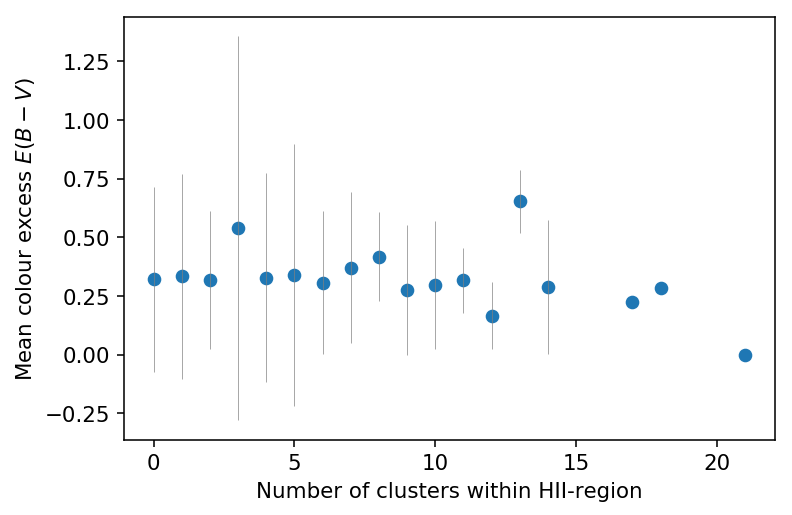

In [12]:
# here the parameters for the pruning are set
classes_sitelle = [1,2,3,4]
classes_legus = [0,1,2,3,4]
max_age = np.inf
min_age = 0
num_of_mag_error = 0
sep = ba.transform_pc_in_ra_dec(np.max(data_sitele[:,12])) #0.00098730133#
# pruning fct and pruned data
data_sitelle_red, data_legus_red, a = ba.prune_to_relevant_data(data_sitele_FOV, data_legus, num_of_mag_error, max_age, classes_sitelle, classes_legus, min_age=min_age)

# investigating if HII-regions without clusters are attached with a higher extinction
ba.mean_features_of_SITELLE_with_num_of_clusters(data_sitelle_red, data_legus_red, 13, save_positional_index=True, linear_fit=False, max_num_of_clusters_in_HII=34)
plt.ylabel('Mean colour excess $E(B-V)$')

# uncomment in order to save figure
#plt.savefig(path+'/mean_extinction_against_num_of_clusters.png', dpi=200, bbox_inches='tight')
plt.show()

Below the distances between HII-regions without star clusters to their next nearst star clusters are investigated

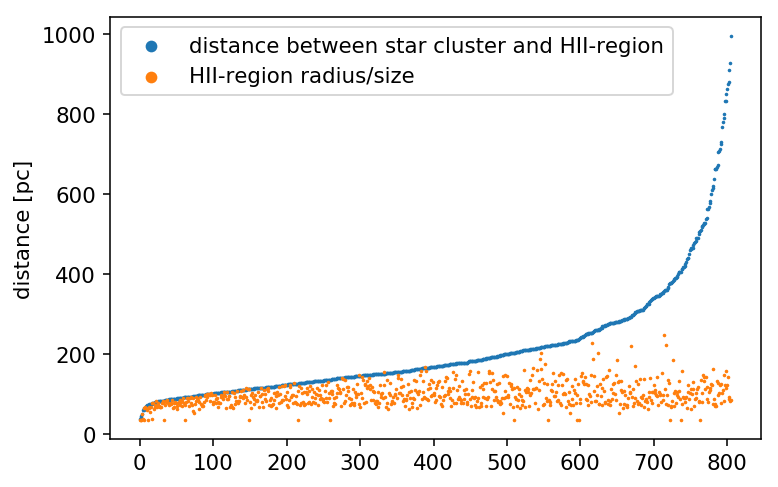

number of rel dist below 10% 85
number of abs dist below 35pc 256


C:\Users\Rapha\Anaconda3\lib\site-packages\ipykernel\__main__.py:56: DeprecationWarning: `factorial` is deprecated!
Importing `factorial` from scipy.misc is deprecated in scipy 1.0.0. Use `scipy.special.factorial` instead.
C:\Users\Rapha\Anaconda3\lib\site-packages\ipykernel\__main__.py:56: RuntimeWarning: invalid value encountered in power


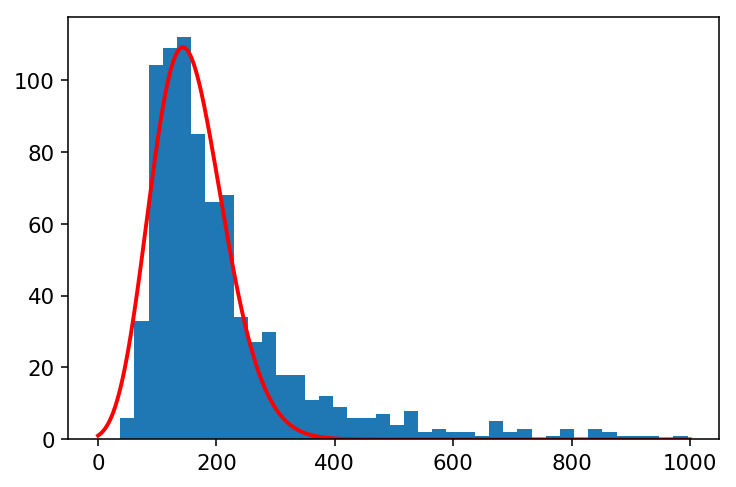

In [13]:
# investigate the distance distribution of the star clusters to HII-regions, which are not directly embedded in an HII-region
# get indices of all HII-region, which have at least one star cluster
dic = ba.clusters_embedded_in_HII_region(data_sitele_FOV, data_legus, True)

mask = np.asarray([len(v)==0 for v in dic.values()])

HII_without_cluster = data_sitele_FOV[mask]
# right ascesion of legus overlap centered
r_asc_le = data_legus[:,3]
# Declination of legus
decl_le =  data_legus[:,4]

# right ascesion of legus overlap decentered (east)
r_asc_si = HII_without_cluster[:,1]
# Declination of legus
decl_si =  HII_without_cluster[:,2]

S = [r_asc_si, decl_si]
L = [r_asc_le, decl_le]
a = ba.Nearest_Neighbor(S, L, np.inf, double_use=False, axis=0)
a = np.asarray(a)

angles = ba.calculate_angle(L[0][a[:,1]], L[1][a[:,1]], S[0][a[:,0]],S[1][a[:,0]])
dist = ba.calculate_distance(angles, dist=9.9e6)
dist = np.asarray(dist)
indices = dist.argsort()
dist_sorted = dist[indices]
sorted_HII_without_cluster = HII_without_cluster[indices]
sorted_data_legus = data_legus[a[:,1]][indices]
plt.scatter([i for i in range(len(dist_sorted))],dist_sorted, s=0.7, label='distance between star cluster and HII-region')
plt.scatter([i for i in range(len(dist_sorted))], sorted_HII_without_cluster[:,12], s=0.7, label='HII-region radius/size')
plt.legend(loc='best', markerscale=6)
plt.ylabel('distance [pc]')

# uncomment in order to save figure
#plt.savefig('dist_distrib_HII-region_without_stars', dpi=200)

plt.show()

rel_dist = dist_sorted/sorted_HII_without_cluster[:,12]
abs_dist = dist_sorted - sorted_HII_without_cluster[:,12]
print('number of rel dist below 10%', np.sum(rel_dist < 1.10))
print('number of abs dist below 35pc', np.sum(abs_dist < 35))

# creation of an histogram to visualize the distances and fitting a poisson distribution on it
from scipy.misc import factorial
dist = np.asarray(dist)

entries, bin_edges, patches = plt.hist(dist, bins=40)

# calculate binmiddles
bin_middles = 0.5*(bin_edges[1:] + bin_edges[:-1])
diff = bin_middles[1]-bin_middles[0]
# poisson function, parameter lamb is the fit parameter
def poisson(k, lamb, amplitude):
    return amplitude*(lamb**k/factorial(k)) * np.exp(-lamb)

#print(bin_middles, entries)

# fit with curve_fit
parameters, cov_matrix = curve_fit(poisson, bin_middles/diff, entries, p0=[80, 173]) 

# plot poisson-deviation with fitted parameter
x_plot = np.linspace(0, 1000/diff, 10000)
#*parameters
plt.plot(x_plot*diff, poisson(x_plot, *parameters), 'r-', lw=2)
plt.show()
# SITELLE allows resolution of 35pcngles = ba.calculate_angle(r_asc_si[a[:,0]], decl_si[a[:,0]], r_asc_le[a[:,1]], decl_le[a[:,1]])

Below the BPT diagram the mass-age diagram and the luminosity function will be plotted

shape legus (3553, 35)
shape legus red (2231, 35)
shape legus_red_class (2231, 35)
shape sitelle (4285, 45)
shape sitelle red (4285, 45)
matching:  (2146, 2)
shape legus (2231, 35)
shape legus red (1529, 35)
shape legus_red_class (1529, 35)
shape sitelle (4285, 45)
shape sitelle red (4285, 45)
matching:  (1690, 2)


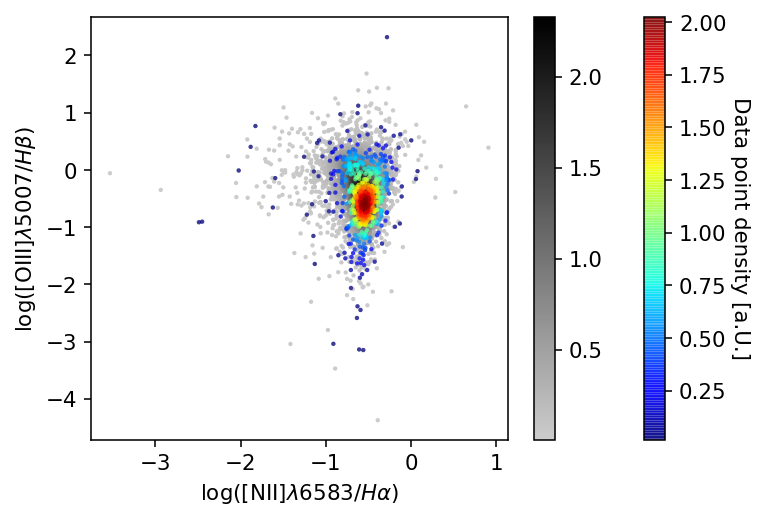

In [14]:
data_legus = LEGUS

classes_sitelle = [1,2,3,4]
classes_legus = [0,1,2,3,4] # previously I also used 0 and 4
max_age = 20e6 #25e6
min_age = 10e-5
num_of_mag_error = 1

data_sitele, data_legus, a = ba.prune_to_relevant_data(data_sitele, data_legus, num_of_mag_error, np.inf, classes_sitelle, classes_legus, min_age=min_age)

data_sitele, data_legus_only_young, a = ba.prune_to_relevant_data(data_sitele, data_legus, num_of_mag_error, max_age, classes_sitelle, classes_legus, min_age=min_age)


dic = ba.clusters_embedded_in_HII_region(data_sitele, data_legus, True)

dic_young = ba.clusters_embedded_in_HII_region(data_sitele, data_legus_only_young, True)

mask_HII_region = np.asarray([len(v)>0 for v in dic.values()])
mask_HII_region_young_c = np.asarray([len(v)>0 for v in dic_young.values()])

max_age = 20e6
data_legus_ = ba.check_if_old_cluster_in_same_HII_as_young(dic, data_legus, max_age=max_age)
dic2 = ba.clusters_embedded_in_HII_region(data_sitele, data_legus_, True)

clusters_ID = sorted({x for v in dic.values() for x in v})
clusters_ID2 = sorted({x for v in dic2.values() for x in v})
mask_clusters = np.zeros(len(data_legus))
mask_clusters2 = np.zeros(len(data_legus_))

for i in clusters_ID:
    mask_clusters[i] = 1
    
for i in clusters_ID2:
    mask_clusters2[i] = 1
    
mask_clusters = mask_clusters.astype(bool)
mask_clusters2 = mask_clusters2.astype(bool)

SITELLE_matched_LEGUS = data_sitele[mask_HII_region]
SITELLE_matched_LEGUS_young = data_sitele[mask_HII_region_young_c]
LEGUS_matched_SITELLE = data_legus[mask_clusters]
LEGUS_matched_SITELLE_without_old = data_legus_[mask_clusters2]

# creating BPT plot with fore and background density plot
oxygenlineratio = data_sitele[:,24]
nitrogenlineratio = data_sitele[:,15]

fig, ax = plt.subplots()#figsize=(9,6 ))

# all lineratios
oxygenlineratio, nitrogenlineratio = ba.return_only_valid_numbers(oxygenlineratio, nitrogenlineratio)

xy = np.vstack([nitrogenlineratio, oxygenlineratio])
z_gray = gaussian_kde(xy)(xy)

idx = z_gray.argsort()
nitrogenlineratio, oxygenlineratio, z_gray = nitrogenlineratio[idx], oxygenlineratio[idx], z_gray[idx]

cmap = plt.get_cmap('binary')
new_cmap = ba.truncate_colormap(cmap,0.2,1)
col1 = ax.scatter(nitrogenlineratio, oxygenlineratio, c=z_gray, s=5, edgecolor='', cmap=new_cmap, label='HII-regions without clusters')


# now only the HII-region lineratios which have at least one embedded star cluster
# creating BPT plot with fore and background density plot
oxygenlineratio = SITELLE_matched_LEGUS_young[:,24]
nitrogenlineratio = SITELLE_matched_LEGUS_young[:,15]

oxygenlineratio, nitrogenlineratio = ba.return_only_valid_numbers(oxygenlineratio, nitrogenlineratio)

xy = np.vstack([nitrogenlineratio, oxygenlineratio])
z_gray = gaussian_kde(xy)(xy)

idx = z_gray.argsort()
nitrogenlineratio, oxygenlineratio, z_gray = nitrogenlineratio[idx], oxygenlineratio[idx], z_gray[idx]

cmap = plt.get_cmap('jet')
new_cmap = ba.truncate_colormap(cmap,0,1)
col2 = ax.scatter(nitrogenlineratio, oxygenlineratio, c=z_gray, s=5, edgecolor='', cmap=new_cmap, alpha=0.7, label='HII-regions with clusters')

ax.set_xlabel(r'$\log ([ $NII$]\lambda 6583 / H \alpha )$')
ax.set_ylabel(r'$\log ([ $OIII$]\lambda 5007 / H \beta )$')
#ax.legend(markerscale=5)
#ax.axis('equal')
cbar = fig.colorbar(col2)
fig.colorbar(col1)
cbar.ax.set_ylabel('Data point density [a.U.]', rotation=270, labelpad=12)

# uncomment in order to save figure
#plt.savefig('BPT.png', dpi=200)

3553


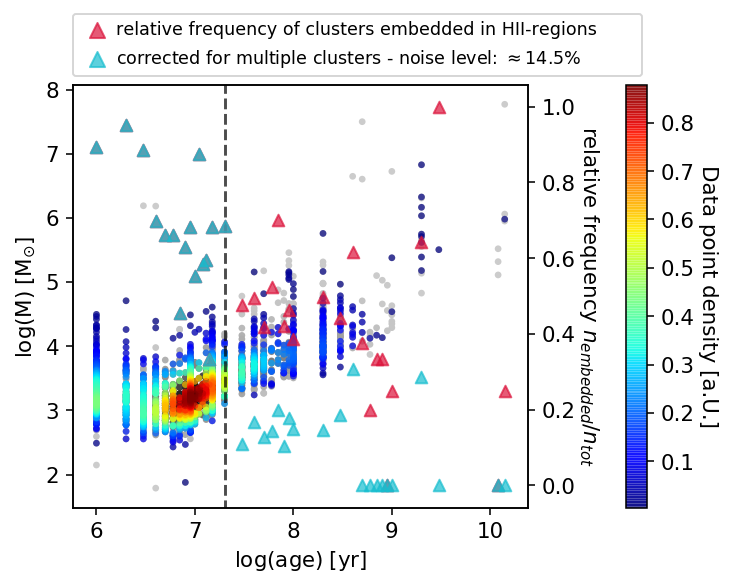

In [15]:
# creating mass-age plot with fore and background density plot
mass = data_legus[:,19]
age = data_legus[:,16]

fig, ax = plt.subplots()#figsize=(9,6 ))

# all mass-age relations
mass, age = ba.return_only_valid_numbers(mass, age, return_zero=False)

# log the mass and the age 
mass = np.log10(mass)
mass_all = mass
age = np.log10(age)
age_all = age

xy = np.vstack([age, mass])
z_gray = gaussian_kde(xy)(xy)

idx = z_gray.argsort()
age, mass, z_gray = age[idx], mass[idx], z_gray[idx]

cmap = plt.get_cmap('binary')
new_cmap = ba.truncate_colormap(cmap,0.2,1)
markersize = 12
col1 = ax.scatter(age, mass, c=z_gray, s=markersize, edgecolor='', cmap=new_cmap, label='HII-regions without clusters')


# now only the star clusters mage-age relation which are embedded in an HII-region
# creating mass-age relation plot with fore and background density plot
mass = LEGUS_matched_SITELLE[:,19]
age = LEGUS_matched_SITELLE[:,16]

mass2 = LEGUS_matched_SITELLE_without_old[:,19]
age2 = LEGUS_matched_SITELLE_without_old[:,16]

# all mass-age relations
mass, age = ba.return_only_valid_numbers(mass, age, return_zero=False)
mass2, age2 = ba.return_only_valid_numbers(mass2, age2, return_zero=False)

# log the mass and the age 
mass = np.log10(mass)
age = np.log10(age)

mass2 = np.log10(mass2)
age2 = np.log10(age2)

xy = np.vstack([age, mass])
z_gray = gaussian_kde(xy)(xy)

idx = z_gray.argsort()
age, mass, z_gray = age[idx], mass[idx], z_gray[idx]

cmap = plt.get_cmap('jet')
new_cmap = ba.truncate_colormap(cmap,0,1)
col2 = ax.scatter(age, mass, c=z_gray, s=markersize, edgecolor='', cmap=new_cmap, alpha=0.7, label='HII-regions with clusters')

ax.set_xlabel(r'$\log ($age$) \; [$yr$]$')
ax.set_ylabel(r'$\log ($M$) \; [$M$_{{\odot}}]$')

cbar = fig.colorbar(col2, pad=0.15)
cbar.ax.set_ylabel('Data point density [a.U.]', rotation=270, labelpad=12)

unique_ages = np.unique(age_all)

relative_occurance = []
relative_occurance2 = []
idx = None
for i,age_step in enumerate(unique_ages):
    relative_occurance.append(len(mass[age == age_step])/len(mass_all[age_all == age_step]))
    relative_occurance2.append(len(mass2[age2 == age_step])/len(mass_all[age_all == age_step]))
    if age_step > 20e6:
        if idx != None:
            continue
        else:
            idx = i

average_missmatching = np.mean(len(mass2[age2 > np.log10(max_age)])/len(mass_all[age_all > np.log10(max_age)]))
daverage_missmatching= np.std(len(mass2[age2 > np.log10(max_age)])/len(mass_all[age_all > np.log10(max_age)]))

ax2 = ax.twinx()
ax2.set_ylabel(r'relative frequency $n_{{embedded}}/n_{{tot}}$', rotation=270, labelpad=13)
ax2.scatter(unique_ages, relative_occurance, c='crimson', marker='^', alpha=0.7, label='relative frequency of clusters embedded in HII-regions')
ax2.scatter(unique_ages, relative_occurance2, c='C9', marker='^', alpha=0.7, label=r'corrected for multiple clusters - noise level: $\approx {:.1f}\%$'.format(average_missmatching*100))
xlim = ax.get_xlim()
ylim = ax.get_ylim()

ax.set_xlim(xlim)
ax.set_ylim(ylim)
ax.plot([np.log10(max_age), np.log10(max_age)+1e-7],[-2,10], color='black', linestyle='--', alpha=0.7)

plt.legend(markerscale=1.3, bbox_to_anchor=(0.,1.02,1.25,1),fontsize=9,loc=3, ncol=1, mode='expand', borderaxespad=0., handletextpad=0.1)

# uncomment in order to save figure
#plt.savefig('massage.png', dpi=200)

data_legus = LEGUS
print(len(data_legus))

Create luminosity distribution/function of all HII-regions and only those containing a star cluster

C:\Users\Rapha\Anaconda3\lib\site-packages\ipykernel\__main__.py:5: RuntimeWarning: invalid value encountered in log10
C:\Users\Rapha\Anaconda3\lib\site-packages\ipykernel\__main__.py:6: RuntimeWarning: invalid value encountered in log10


4158
741
5.611336032388664
median 36.94714439706975


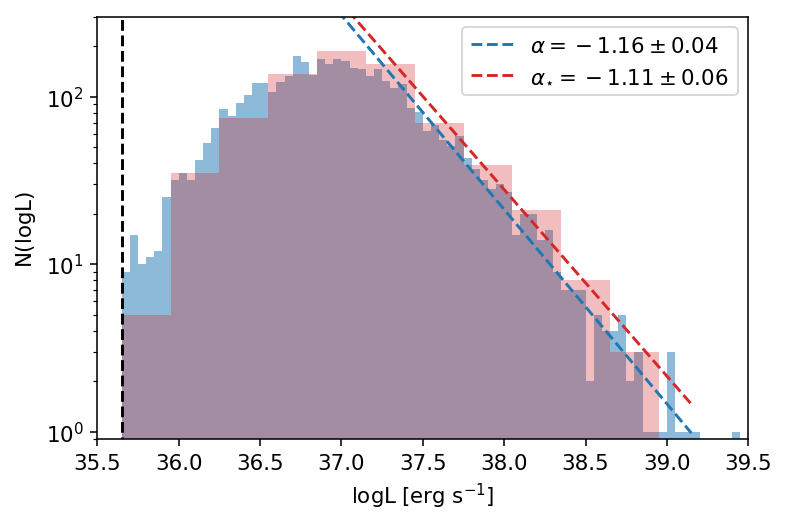

In [16]:
HII_lum = data_sitele[:,4]

HII_lum_wc = SITELLE_matched_LEGUS[:,4]

log_HII_lum = np.log10(HII_lum)
log_HII_lum_wc = np.log10(HII_lum_wc) 

log_HII_lum, log_HII_lum = ba.return_only_valid_numbers(log_HII_lum, log_HII_lum)
log_HII_lum_wc, log_HII_lum_wc = ba.return_only_valid_numbers(log_HII_lum_wc, log_HII_lum_wc)

mask = log_HII_lum >= 35.65
mask2 = log_HII_lum_wc >=35.65

log_HII_lum = log_HII_lum[mask]
print(len(log_HII_lum))
print(len(log_HII_lum_wc))

print(len(log_HII_lum)/len(log_HII_lum_wc))
fac = np.round(len(log_HII_lum)/len(log_HII_lum_wc))
# detection limit is 35.65 bin size in SITELLE
lower_lim =35.65
higher_lim = 39.5

plt.xlim(lower_lim-0.15, higher_lim)
plt.ylim(0.9, 300)

binsize = 0.05
nbins = int((higher_lim - lower_lim)/binsize)
bins = []

binsize_wc = binsize*fac
nbins_wc = int((higher_lim - lower_lim)/binsize_wc)
bins_wc = []

for i in range(nbins):
    bins.append(lower_lim+i*binsize)
    
for i in range(nbins_wc):
    bins_wc.append(lower_lim+i*binsize_wc)

n, bins, patches = plt.hist(log_HII_lum, bins=bins, alpha=0.5)
n_wc, bins_wc, patches_wc = plt.hist(log_HII_lum_wc, bins=bins_wc, alpha=.3, color='C3')

plt.yscale('log')

def linear(x, m, c):
    return m*x+c

def power_law_plot(x, k, a):
    return 10**(a+k*x)

print('median',np.median(log_HII_lum))

bins_fit = bins[:-1][np.where((bins[:-1] >= 37.15) & (bins[:-1] <= 39.3))]
n_fit = n[np.where((bins[:-1] >= 37.15) & (bins[:-1] <= 39.3))]

bins_fit_wc = bins_wc[:-1][np.where((bins_wc[:-1] >= 37.15) & (bins_wc[:-1] <= 39.3))]
n_fit_wc = n_wc[np.where((bins_wc[:-1] >= 37.15) & (bins_wc[:-1] <= 39.3))]

bins_fit, n_fit = ba.return_only_valid_numbers(bins_fit, n_fit, return_zero=False)
bins_fit_wc, n_fit_wc = ba.return_only_valid_numbers(bins_fit_wc, n_fit_wc, return_zero=False)

popt, pcov = curve_fit(linear, (bins_fit+binsize/2), np.log10(n_fit), p0=[-1.12, 2])
popt_wc, pcov_wc = curve_fit(linear, (bins_fit_wc+binsize_wc/2), np.log10(n_fit_wc), p0=[-1.12, 2])

x = np.arange(36.15, 39.5)
plt.plot(x, power_law_plot(x, popt[0], popt[1]), color='C0', ls='--', label=r'$\alpha = {:.2f}\pm{:.2f}$'.format(popt[0], np.sqrt(pcov[0][0])))
plt.plot(x, power_law_plot(x, popt_wc[0], popt_wc[1]), color='C3', ls='--', label=r'$\alpha_{{\star}} = {:.2f}\pm{:.2f}$'.format(popt_wc[0], np.sqrt(pcov_wc[0][0])))
plt.plot([35.65, 35.65], [0,1000], color='black', ls='--')
plt.xlabel('$\log $L$ \; [$erg s$^{-1}$$]$')
plt.ylabel('N($\log$L)')
plt.legend()

# uncomment in order to save figure
#plt.savefig('Halpha_luminosity_fct.png', dpi=120)
plt.show()

shape legus (3553, 35)
shape legus red (2231, 35)
shape legus_red_class (2231, 35)
shape sitelle (1860, 45)
shape sitelle red (1860, 45)
matching:  (2140, 2)


C:\Users\Rapha\OneDrive\Uni\Bachelor\Methodology\Methods_BA.py:1768: RuntimeWarning: Mean of empty slice
  features.append(np.nanmean(data_sitele_0[:,feature][mask_for_invalid]))
C:\Users\Rapha\Anaconda3\lib\site-packages\numpy\lib\nanfunctions.py:1434: RuntimeWarning: Degrees of freedom <= 0 for slice.
  keepdims=keepdims)


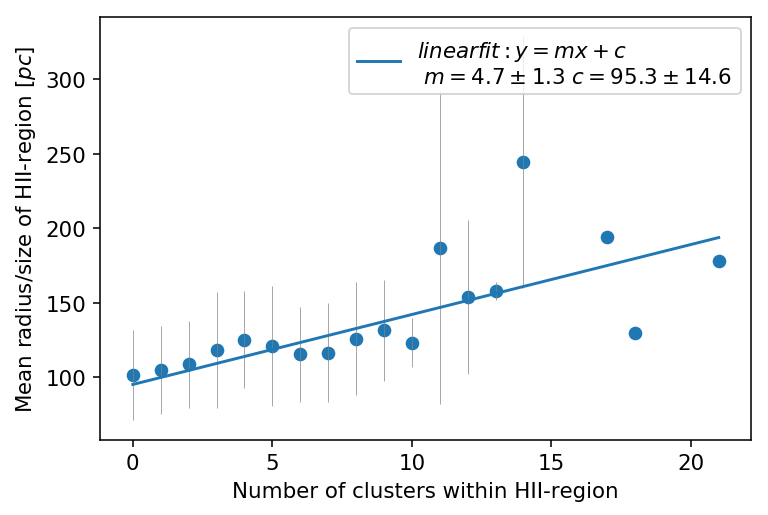

In [17]:
# here the parameters for the pruning are set
classes_sitelle = [1,2,3,4]
classes_legus = [0,1,2,3,4]
max_age = np.inf
min_age = 0
num_of_mag_error = 0
sep = ba.transform_pc_in_ra_dec(np.max(data_sitele[:,12])) #0.00098730133#
# pruning fct and pruned data
data_sitelle_red, data_legus_red, a = ba.prune_to_relevant_data(data_sitele_FOV, data_legus, num_of_mag_error, max_age, classes_sitelle, classes_legus, min_age=min_age)

ba.mean_features_of_SITELLE_with_num_of_clusters(data_sitelle_red, data_legus_red, 12, save_positional_index=True, linear_fit=True, max_num_of_clusters_in_HII=34)
plt.ylabel('Mean radius/size of HII-region $[pc]$')

# uncomment in order to save figure
#plt.savefig(path+'/test.png', dpi=200)
plt.show()

shape legus (3553, 35)
shape legus red (1519, 35)
shape legus_red_class (689, 35)
shape sitelle (1860, 45)
shape sitelle red (1860, 45)
matching:  (773, 2)


C:\Users\Rapha\OneDrive\Uni\Bachelor\Methodology\Methods_BA.py:1768: RuntimeWarning: Mean of empty slice
  features.append(np.nanmean(data_sitele_0[:,feature][mask_for_invalid]))
C:\Users\Rapha\Anaconda3\lib\site-packages\numpy\lib\nanfunctions.py:1434: RuntimeWarning: Degrees of freedom <= 0 for slice.
  keepdims=keepdims)


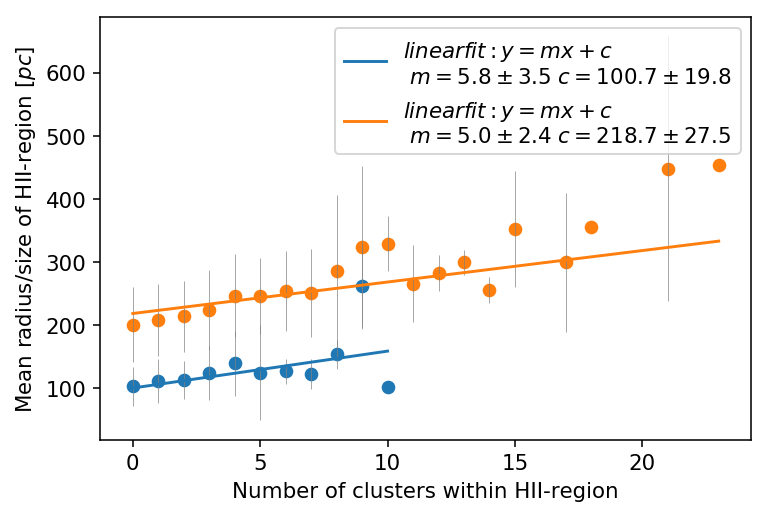

In [18]:
path = r'D:/Uni/Bachelor_Arbeit/Plot/Sitelle_features_against_number_of_clusters'
# here the parameters for the pruning are set
classes_sitelle = [1,2,3,4]
classes_legus = [1,2,3]
max_age = 20e6
min_age = 10e-5
num_of_mag_error = 4

sep = ba.transform_pc_in_ra_dec(np.max(data_sitele[:,12])) #0.00098730133#
# pruning fct and pruned data
data_sitelle_red, data_legus_red, a = ba.prune_to_relevant_data(data_sitele_FOV, data_legus, num_of_mag_error, max_age, classes_sitelle, classes_legus, min_age=min_age)

data_sitelle_red_2_times_size = deepcopy(data_sitelle_red)
data_sitelle_red_2_times_size[:,12] = data_sitelle_red_2_times_size[:,12]*2
ba.mean_features_of_SITELLE_with_num_of_clusters(data_sitelle_red, data_legus_red, 12, save_positional_index=True, linear_fit=True, max_num_of_clusters_in_HII=30)

ba.mean_features_of_SITELLE_with_num_of_clusters(data_sitelle_red_2_times_size, data_legus_red, 12, save_positional_index=True, linear_fit=True)
plt.ylabel('Mean radius/size of HII-region $[pc]$')

# uncomment in order to save figure
#plt.savefig(path+'/artifical_cluster_enlarging.png', dpi=200)
plt.show()

In [19]:
# here the parameters for the pruning are set
classes_sitelle = [1,2,3,4]
classes_legus = [1,2,3]
max_age = 20e6 #25e6
min_age = 10e-5
num_of_mag_error = 4
sep = ba.transform_pc_in_ra_dec(np.max(data_sitele_r[:,12])) #0.00098730133#
# pruning fct and pruned data
data_sitelle_red, data_legus_red, a = ba.prune_to_relevant_data(data_sitele_r, data_legus_r, num_of_mag_error, max_age, classes_sitelle, classes_legus, min_age=min_age)
data_sitelle_red_pc, data_legus_red_pc, a2 = ba.prune_to_relevant_data_using_NN(data_sitele_r, data_legus_r, num_of_mag_error, max_age, classes_sitelle, classes_legus, sep = ba.transform_pc_in_ra_dec(10, 9.9e6), min_age=min_age)

shape legus (333, 35)
shape legus red (124, 35)
shape legus_red_class (67, 35)
shape sitelle (387, 45)
shape sitelle red (387, 45)
matching:  (73, 2)
shape legus (333, 35)
shape legus red (124, 35)
shape legus_red_class (67, 35)
shape sitelle (387, 45)
shape sitelle red (387, 45)
matching:  (5, 2)


shape legus (333, 35)
shape legus red (124, 35)
shape legus_red_class (67, 35)
shape sitelle (387, 45)
shape sitelle red (387, 45)
matching:  (73, 2)
number of matches (73,)


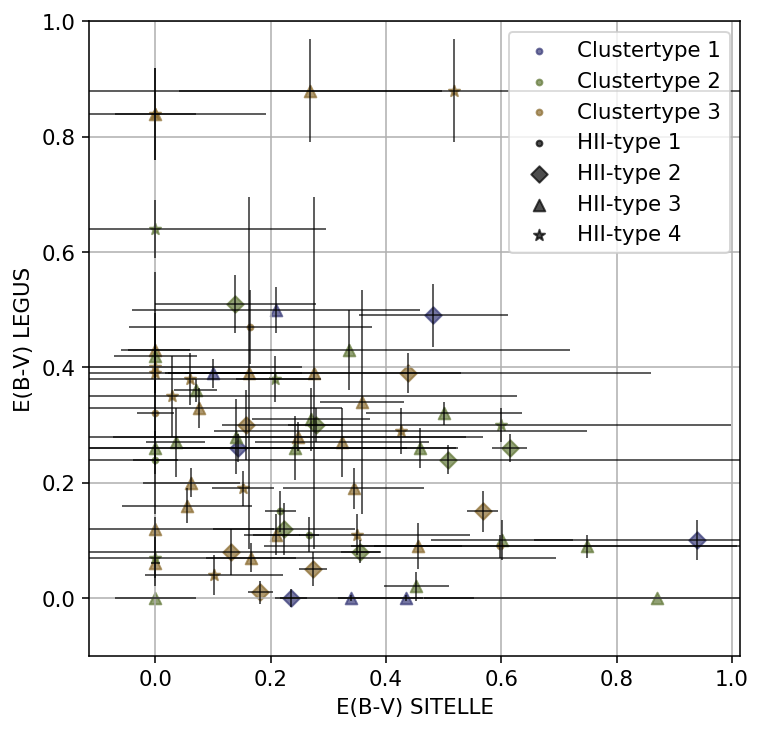

In [20]:
# plot extinction correlation
data_sitelle_red, data_legus_red, a = ba.prune_to_relevant_data(data_sitele_r, data_legus_r, num_of_mag_error, max_age, classes_sitelle, classes_legus, min_age=min_age)
filename = ba.plot_extinction_correlation(a, data_sitelle_red, data_legus_red, classes_sitelle, classes_legus, max_age=max_age, path=path, sep=sep, fit_line=False)

# uncomment in order to save figure
#plt.savefig('Extinction_corr_between_HII_regions_with_only_one_cluster_below_20Myr.png', dpi=240)
plt.show()

In the following the Halpha-luminosity of the HII-regions and the magnitudes of the star clusters and masses will be investigated

In the next two cells only HII-regions, which only have one star cluster, will be considered.

C:\Users\Rapha\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:545: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


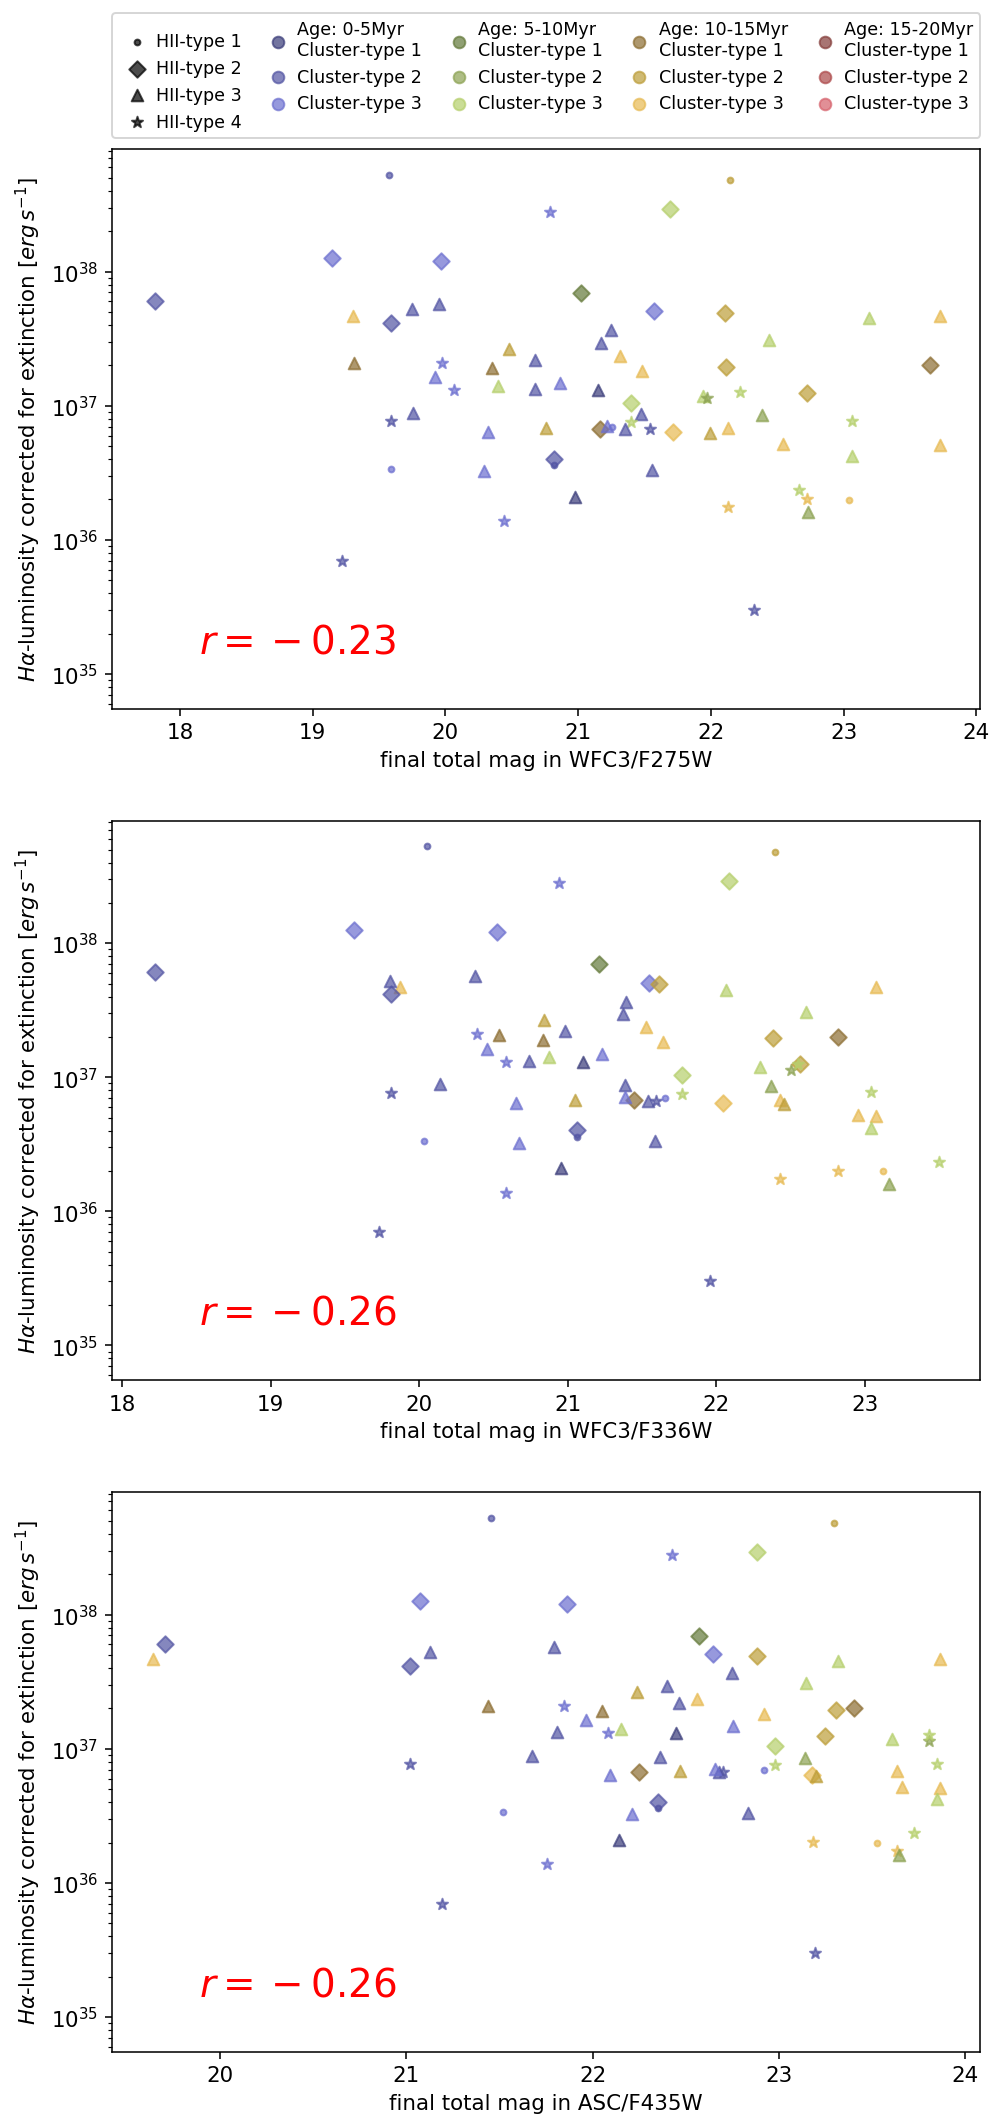

In [21]:
# the handmade relevant features, look up the readme's of the data catalouges to know which feature corresponds to which number
legus_mask_for_features = [5,7,9] # [mag in 275, mag in 336, mag in 435]
legus_scales = ['linear','linear','linear']
sitelle_mask_for_features = [4] # Halpha-luminosity
sitelle_scales = ['log']
ba.check_if_clusters_are_embedded(data_sitelle_red, data_legus_red, a)
x_limits = [None,None,None]
y_limits = [None,[1e35,7e38], [1e35,7e38]]

dic = ba.clusters_embedded_in_HII_region(data_sitelle_red, data_legus_red, save_positional_index=True)
a = ba.create_matching_for_embedded(data_sitelle_red, data_legus_red)
agebins = [[0,5e6],[5e6,10e6],[10e6,15e6],[15e6,20e6]]
ba.multiplot_consider_multiple_clusters_in_HII(legus_mask_for_features, sitelle_mask_for_features, data_legus_red, data_sitelle_red, a, dic, 'correlations_between_lineratios_for_class1_25Myr_only_one_cluster_per_HII_100dpi.png', path=path, xscales=legus_scales, yscales=sitelle_scales, save_XY_data=False, classes_le= classes_legus, classes_st= classes_sitelle, frequ=10, set_xlim=x_limits, set_ylim=y_limits, agebins=agebins, maxaged_cluster=True, print_corr_coef=True, legend_fontsize=9)

# uncomment in order to save figure
#plt.savefig('multiplot_one_cluster_per_HII_size_mass_mag.png', dpi=240)
plt.show()

C:\Users\Rapha\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:545: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


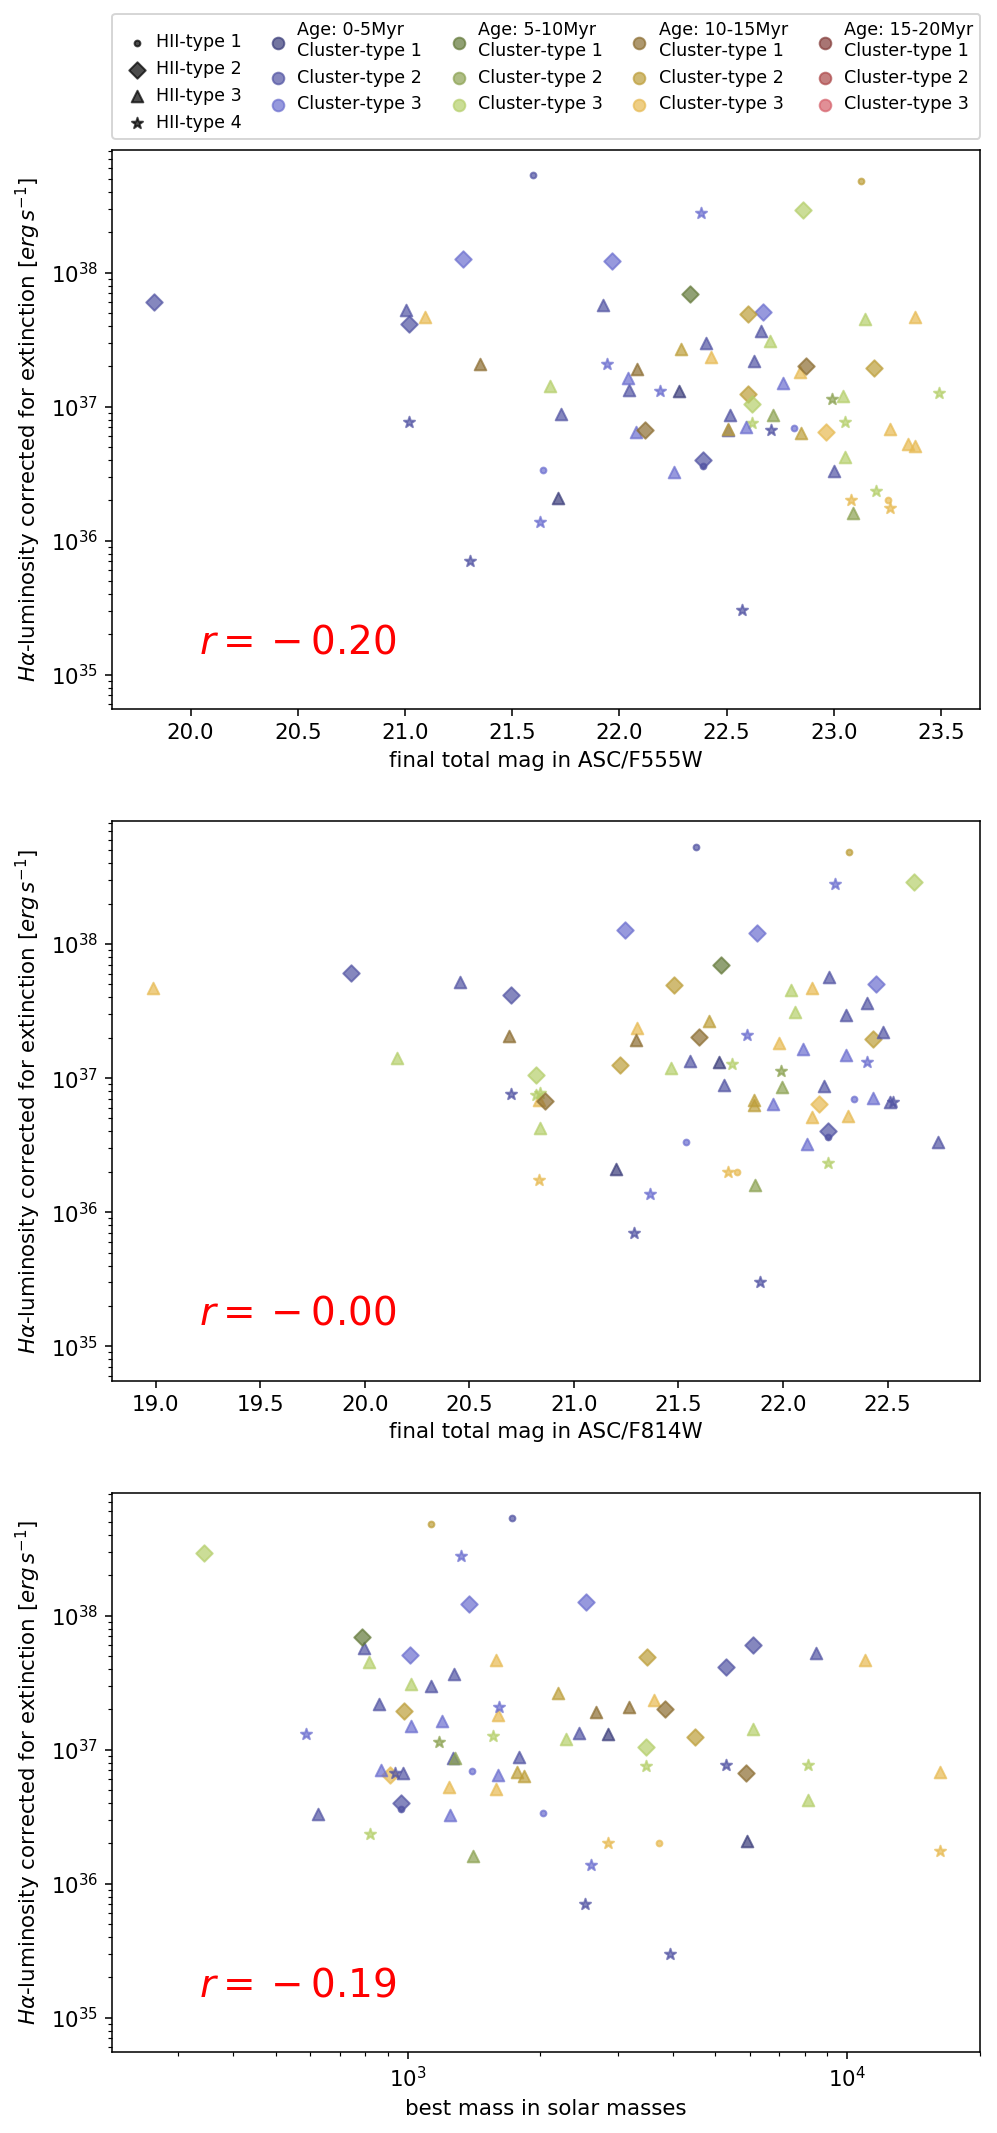

In [22]:
# the handmade relevant features, look up the readme's of the data catalouges to know which feature corresponds to which number
legus_mask_for_features = [11,13,19] # [mag in 555, mag in 814, mass]
legus_scales = ['linear','linear','log']
sitelle_mask_for_features = [4] # Halpha luminosity
sitelle_scales = ['log']
ba.check_if_clusters_are_embedded(data_sitelle_red, data_legus_red, a)
x_limits = [None,None,None]
y_limits = [None,[1e35,7e38], [1e35,7e38]]

dic = ba.clusters_embedded_in_HII_region(data_sitelle_red, data_legus_red, save_positional_index=True)
a = ba.create_matching_for_embedded(data_sitelle_red, data_legus_red)
agebins = [[0,5e6],[5e6,10e6],[10e6,15e6],[15e6,20e6]]
ba.multiplot_consider_multiple_clusters_in_HII(legus_mask_for_features, sitelle_mask_for_features, data_legus_red, data_sitelle_red, a, dic, 'correlations_between_lineratios_for_class1_25Myr_only_one_cluster_per_HII_100dpi.png', path=path, xscales=legus_scales, yscales=sitelle_scales, save_XY_data=False, classes_le= classes_legus, classes_st= classes_sitelle, frequ=10, set_xlim=x_limits, set_ylim=y_limits, agebins=agebins, maxaged_cluster=True, print_corr_coef=True, legend_fontsize=9)

# uncomment in order to save figure
#plt.savefig('multiplot_one_cluster_per_HII_size_mass_mag.png', dpi=240)
plt.show()

That is a correlation, which the PCA below found

C:\Users\Rapha\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:545: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


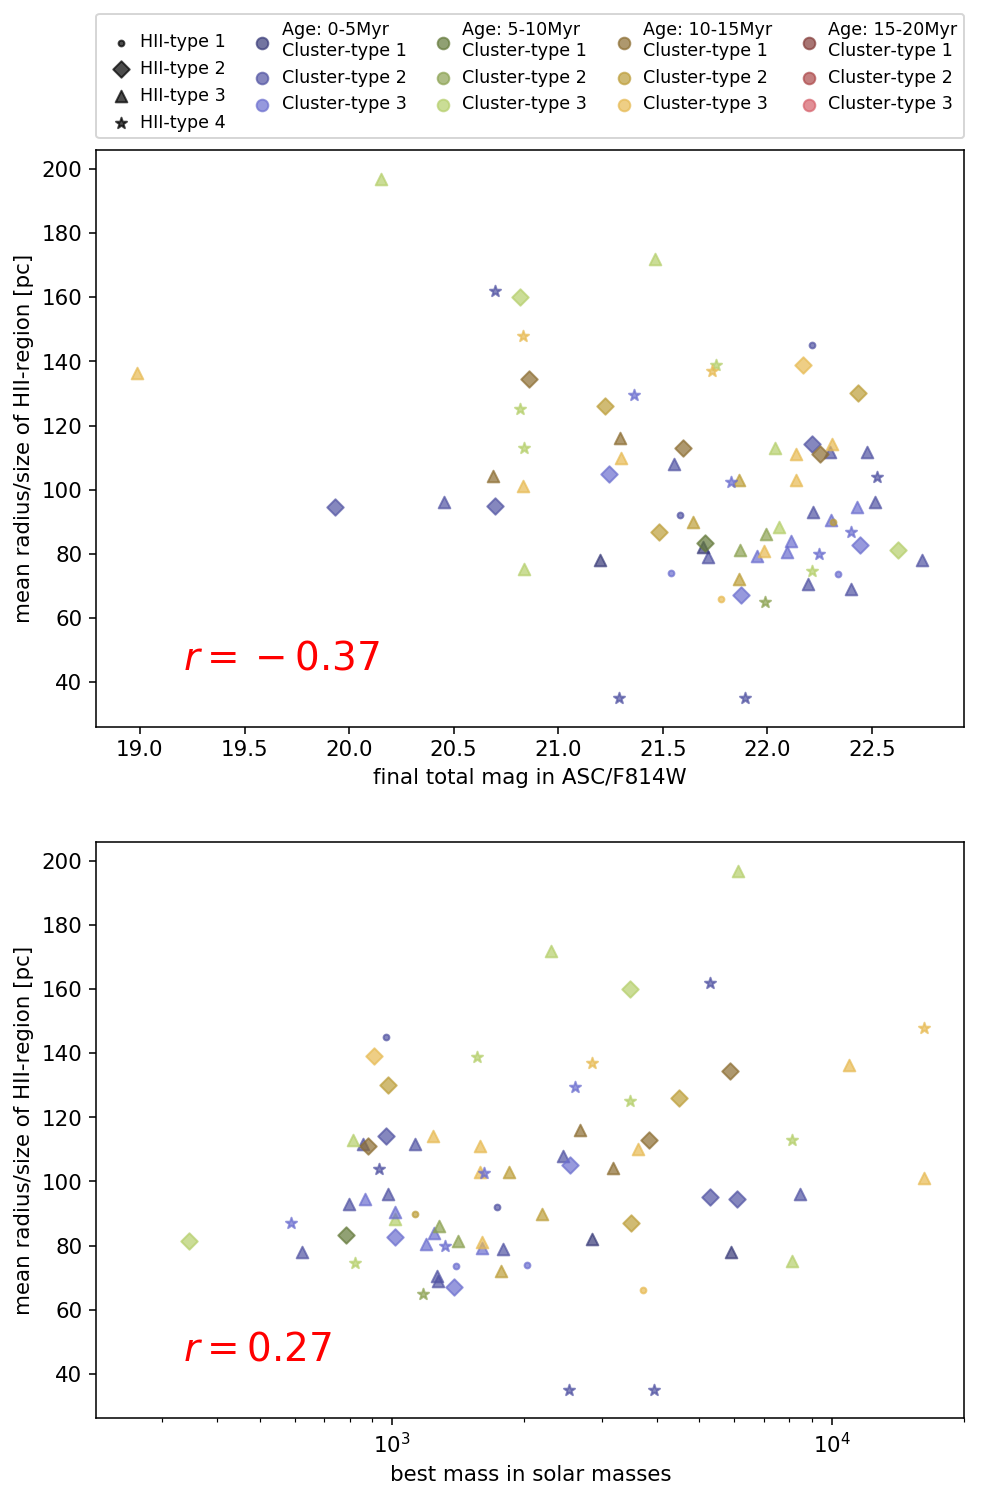

In [23]:
# the handmade relevant features, look up the readme's of the data catalouges to know which feature corresponds to which number
legus_mask_for_features = [13,19] # [mag in 814, mass]
legus_scales = ['linear','log']
sitelle_mask_for_features = [12] # HII-region size
sitelle_scales = ['linear']
ba.check_if_clusters_are_embedded(data_sitelle_red, data_legus_red, a)
x_limits = [None,None]
y_limits = [None,[1e35,7e38], [1e35,7e38]]

dic = ba.clusters_embedded_in_HII_region(data_sitelle_red, data_legus_red, save_positional_index=True)
a = ba.create_matching_for_embedded(data_sitelle_red, data_legus_red)
agebins = [[0,5e6],[5e6,10e6],[10e6,15e6],[15e6,20e6]]
ba.multiplot_consider_multiple_clusters_in_HII(legus_mask_for_features, sitelle_mask_for_features, data_legus_red, data_sitelle_red, a, dic, 'correlations_between_lineratios_for_class1_25Myr_only_one_cluster_per_HII_100dpi.png', path=path, xscales=legus_scales, yscales=sitelle_scales, save_XY_data=False, classes_le= classes_legus, classes_st= classes_sitelle, frequ=10, set_xlim=x_limits, set_ylim=y_limits, agebins=agebins, maxaged_cluster=True, print_corr_coef=True, legend_fontsize=9)

# uncomment in order to save figure
#plt.savefig('multiplot_one_cluster_per_HII_size_mass_mag.png', dpi=240)
plt.show()

Now multiple cluster per HII-region will be considered

shape legus (3553, 35)
shape legus red (1519, 35)
shape legus_red_class (689, 35)
shape sitelle (4285, 45)
shape sitelle red (4285, 45)
matching:  (774, 2)


C:\Users\Rapha\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:545: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


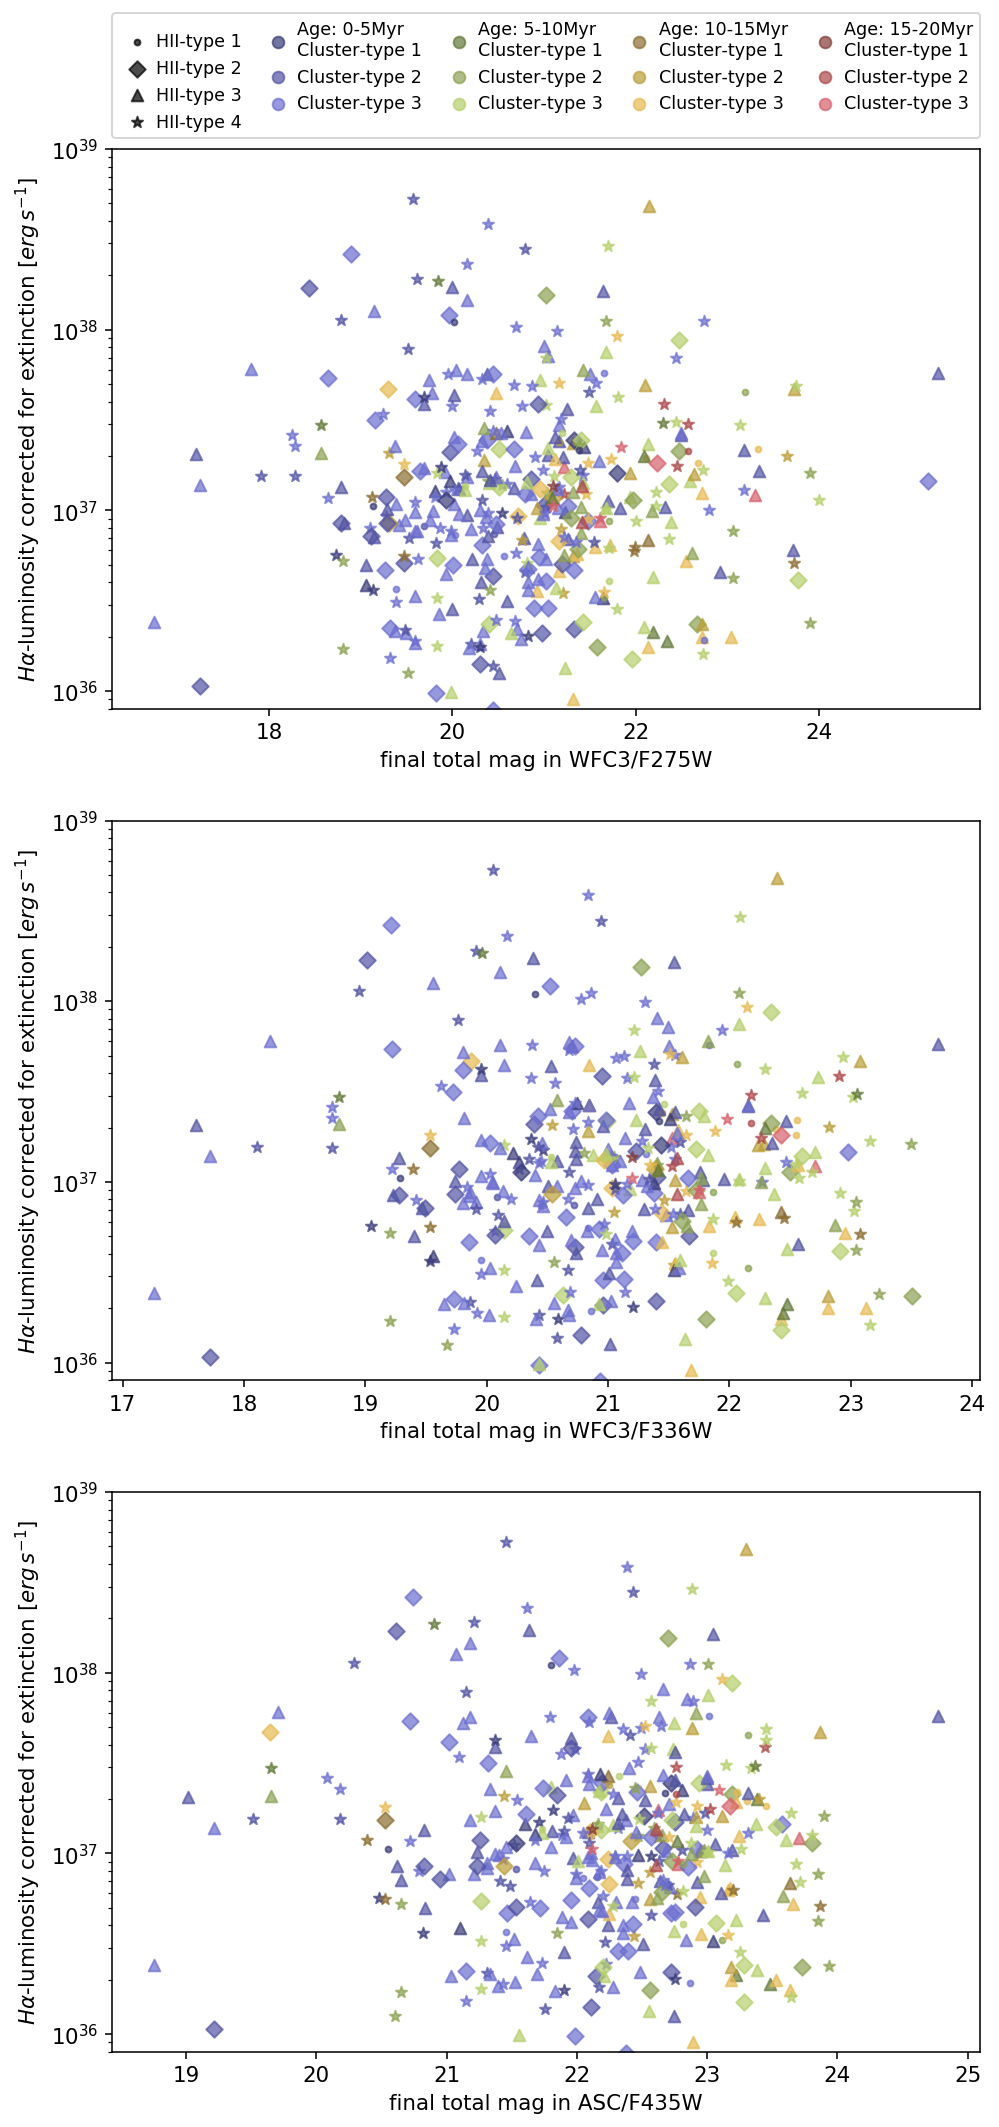

In [24]:
data_legus = LEGUS
# here the parameters for the pruning are set
classes_sitelle = [1,2,3,4]
classes_legus = [1,2,3]
max_age = 20e6
min_age = 1e-4
num_of_mag_error = 4

# pruning fct and pruned data
data_sitelle_red, data_legus_red, a = ba.prune_to_relevant_data(data_sitele, data_legus, num_of_mag_error, max_age, classes_sitelle, classes_legus, min_age=min_age)

# the handmade relevant features, look up the readme's of the data catalouges to know which feature corresponds to which number
legus_mask_for_features = [5,7,9] # [mag in 275, mag in 336, mag in 435]
legus_scales = ['linear','linear','linear']
sitelle_mask_for_features = [4] # Halpha luminosity
sitelle_scales = ['log']
x_limits = [None, None, None]
y_limits = [(0.8*1e36,1e39),None]

dic = ba.clusters_embedded_in_HII_region(data_sitelle_red, data_legus_red, save_positional_index=True)
a = ba.create_matching_for_embedded(data_sitelle_red, data_legus_red)
agebins = [[0,5e6],[5e6,10e6],[10e6,15e6],[15e6,20e6]]
ba.multiplot_consider_multiple_clusters_in_HII(legus_mask_for_features, sitelle_mask_for_features, data_legus_red, data_sitelle_red, a, dic, 'correlations_between_lineratios_for_class1_25Myr_only_one_cluster_per_HII_100dpi.png', path=path, xscales=legus_scales, yscales=sitelle_scales, save_XY_data=False, classes_le= classes_legus, classes_st= classes_sitelle, frequ=10, set_xlim=x_limits, set_ylim=y_limits, agebins=agebins, maxaged_cluster=True, print_corr_coef=False, legend_fontsize=9)
plt.show()

shape legus (3553, 35)
shape legus red (1519, 35)
shape legus_red_class (689, 35)
shape sitelle (4285, 45)
shape sitelle red (4285, 45)
matching:  (774, 2)


C:\Users\Rapha\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:545: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


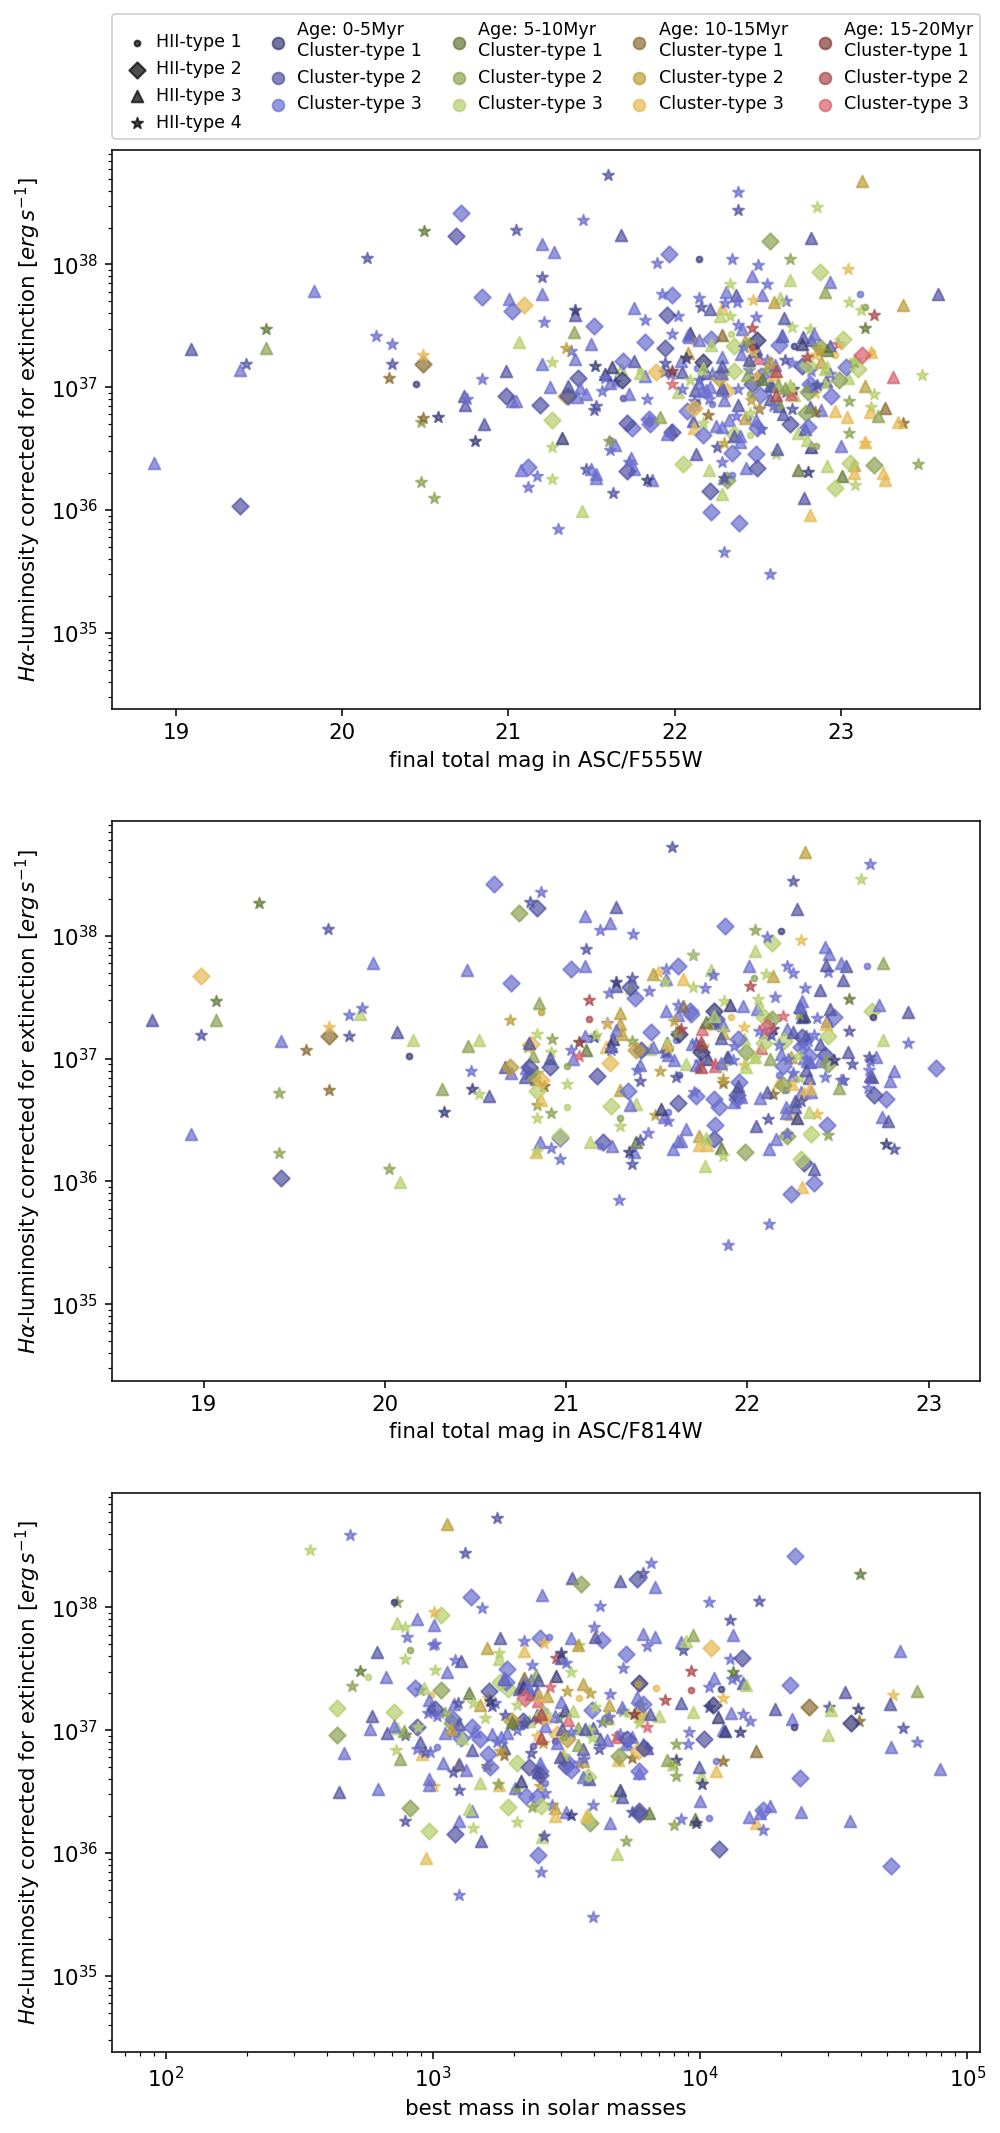

In [25]:
data_legus = LEGUS
# here the parameters for the pruning are set
classes_sitelle = [1,2,3,4]
classes_legus = [1,2,3]
max_age = 20e6
min_age = 1e-4
num_of_mag_error = 4

# pruning fct and pruned data
data_sitelle_red, data_legus_red, a = ba.prune_to_relevant_data(data_sitele, data_legus, num_of_mag_error, max_age, classes_sitelle, classes_legus, min_age=min_age)

# the handmade relevant features, look up the readme's of the data catalouges to know which feature corresponds to which number
legus_mask_for_features = [11,13,19] # [mag in 555, mag in 814, mass] 
legus_scales = ['linear','linear','log']
sitelle_mask_for_features = [4] # Halpha-luminosity
sitelle_scales = ['log']
x_limits = [None, None, None]
y_limits = [None]

dic = ba.clusters_embedded_in_HII_region(data_sitelle_red, data_legus_red, save_positional_index=True)
a = ba.create_matching_for_embedded(data_sitelle_red, data_legus_red)
agebins = [[0,5e6],[5e6,10e6],[10e6,15e6],[15e6,20e6]]
ba.multiplot_consider_multiple_clusters_in_HII(legus_mask_for_features, sitelle_mask_for_features, data_legus_red, data_sitelle_red, a, dic, 'correlations_between_lineratios_for_class1_25Myr_only_one_cluster_per_HII_100dpi.png', path=path, xscales=legus_scales, yscales=sitelle_scales, save_XY_data=False, classes_le= classes_legus, classes_st= classes_sitelle, frequ=10, set_xlim=x_limits, set_ylim=y_limits, agebins=agebins, maxaged_cluster=True, print_corr_coef=False, legend_fontsize=9)
plt.show()

# PCA

In [26]:
# now trying it for my data # maybe try PCA for data describing only one cluster per HII-region
# it is actually tricky to say which way of pruning is more appropriated
# since you can first only take the clusters which are the only one in an HII-region and then prune them for their other parameters
# or you can first prune them for their other parameters and therefore create new star clusters which are the only ones in the respective HII-region since not all star clusters are considered
# load which clusters are embedded within which HII-region
dic = ba.clusters_embedded_in_HII_region(data_sitele, data_legus, save_positional_index=True)

# here after the legus data only countains those star clusters which are the only ones embedded within a HII-region
data_sitele_r, data_legus_r = ba.reduce_dic_to_n_embedded(1, dic, data_sitele, data_legus, save_positional_index=True)

# first get the matches
# here the parameters for the pruning are set
classes_sitelle = [1,2,3,4]
classes_legus = [1,2,3]
max_age = 20e6
min_age = 10e-5
num_of_mag_error = 4
# pruning fct and pruned data
data_sitelle_red, data_legus_red, a = ba.prune_to_relevant_data(data_sitele_r, data_legus_r, num_of_mag_error, max_age, classes_sitelle, classes_legus, min_age=min_age)

data_sitelle_red = ba.select_pairs(data_sitelle_red, a, 0)
data_legus_red = ba.select_pairs(data_legus_red, a, 1)

# the features which the PCA should be applied to
indx_feature_sitelle = []#[3, 4, 6, 12, 13, 15, 18, 21, 24, 27, 30, 33, 36, 39, 42]#[3, 4, 6, 12, 13, 15, 18, 21, 24, 27, 30, 33, 36, 39, 42] #[3,4,24,36]#[]#
indx_feature_legus = [5, 7, 9, 11, 13,16, 19, 22, 33]#[33]#[5, 7, 9, 11, 13,16, 19, 22, 33]#[]#[5, 7, 9, 11, 13,16, 19, 22, 33]#[5, 7, 9, 11, 13, 19,22][16,19]#

# [5, 7, 9, 11, 13,16, 19, 22, 33] <-- features which were used for the analysis written in the bachelor's thesis for the LEGUS data
# [3, 4, 6, 12, 13, 15, 18, 21, 24, 27, 30, 33, 36, 39, 42] <-- features which were used for the analysis written in the bachelor's thesis for the SITELLE data

# [5, 13,16, 19, 33] <-- first try of dropping variables probably better if I use linear combination of several features according to the eigenvector
# [3, 4, 6, 12, 15, 18, 21, 30, 33, 42] <-- first try dropping variables for SITELLE 

# only use the above features and rescale them to mean 0 and unit stddev
X, mask_sitelle, mask_legus = ba.create_dataset_for_pca(data_sitelle_red, data_legus_red, indx_feature_sitelle, indx_feature_legus, scale_data=True, print_used_features=True, return_mask_of_observations=True)
X, pruning_mask = ba.create_dataset_for_pca(data_sitelle_red, data_legus_red, indx_feature_sitelle, indx_feature_legus, scale_data=True, print_used_features=False, return_pruning_mask=True)

print('len pruning mask and len datasets', np.sum(pruning_mask), len(data_sitelle_red), len(X))
data_sitelle_red_p = data_sitelle_red[pruning_mask]
data_legus_red_p = data_legus_red[pruning_mask]

shape legus (333, 35)
shape legus red (124, 35)
shape legus_red_class (67, 35)
shape sitelle (387, 45)
shape sitelle red (387, 45)
matching:  (73, 2)
legus features: ----------------
final total mag in WFC3/F275W
final total mag in WFC3/F336W
final total mag in ASC/F435W
final total mag in ASC/F555W
final total mag in ASC/F814W
best age in yr
best mass in solar masses
best E(B-V)
Final assigned class
sitelle features: ----------------
(73, 35) (73, 45) (68, 9)
len pruning mask and len datasets 68 73 68


In [27]:
components = np.shape(X)[1]
print(np.shape(X))
# set up the PCA and give the number of components
pca = PCA(n_components=components, svd_solver='full')
# fit the PCA
#pca_sitelle_legus = pca.fit_transform(X)
pca_sitelle_legus = pca.fit(X)

(68, 9)


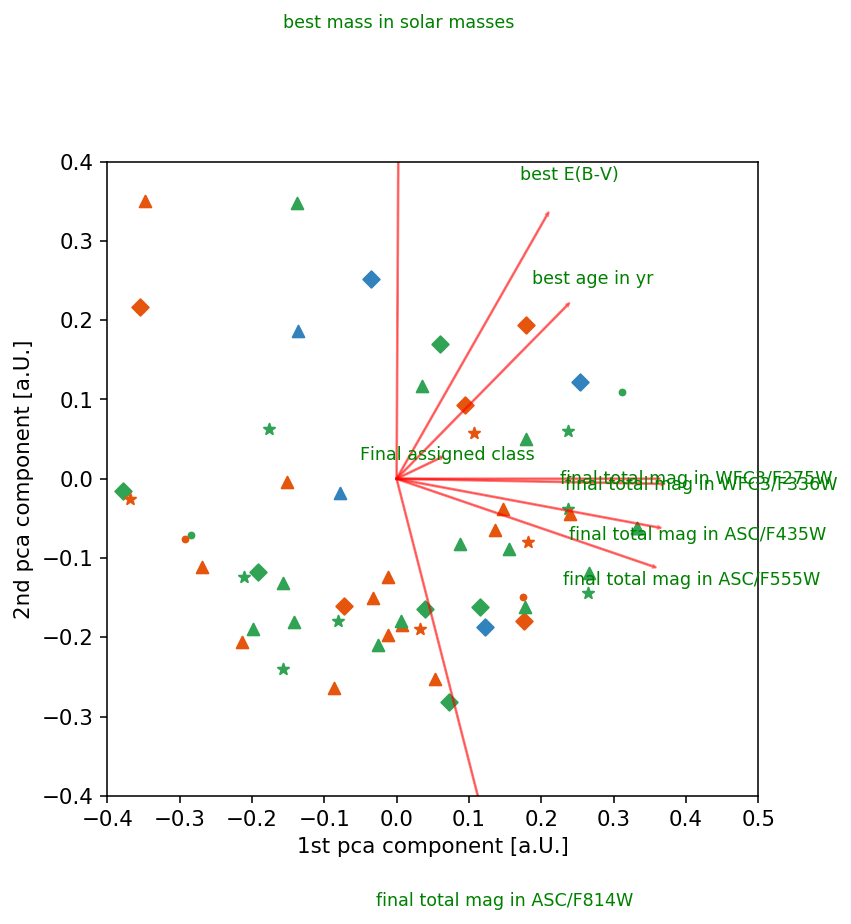

In [28]:
dir_sitelle_featurename_and_id_short_names = {0:"ID of Region", 1:"RA", 2:"DEC", 3:"Galactocentric radius", 4:r"H$\alpha$-luminosity corrected for extinction", 5:r"H$\alpha$ mean diffuse ionized gaz backgound level", 6:"Region category", 7:"I0", 8:"Amp", 9:"sig", 10:"alpha", 11:"R2", 12:"size/radis [pc]", 13:"E(B-V)", 14:"EBV_err; extinction error; E(B-V error)", 15:r"log [NII]6583/H$\alpha$", 16:"error on log [NII]6583/Ha; log line ratio error", 17:"SNR_cross [NII]6583/Ha; line ratio best SNR", 18:r"log ([SII]6716+6731)/H$\alpha$", 19:"error on log [SII]6716+6731/Ha; log line ratio error", 20:"SNR_cross [SII]6716+6731/Ha; line ratio best SNR", 21:"log ([SII]6716+6731)/[NII]6583", 22:"error on log [SII]6716+6731/[NII]6583; log line ratio error", 23:"SNR_cross on [SII]6716+6731/[NII]6583; line ratio best SNR", 24:r"log [OIII]5007/H$\beta$", 25:"error on log [OIII]5007/Hb ; log line ratio error", 26:"SNR_cross on [OIII]5007/Hb; line ratio best SNR", 27:r"log [OII]3727/H$\beta$", 28:"error on log [OII]3727/Hb ; log line ratio error", 29:"SNR_cross on [OII]3727/Hb; line ratio best SNR", 30:r"log ([OII]3727+[OIII]5007)/H$\beta$", 31:"error on log ([OII]3727+[OIII]5007)/Hb ; log line ratio error", 32:"SNR_cross on ([OII]3727+[OIII]5007)/Hb; line ratio best SNR", 33:r"log [OIII]5007/[OII]3727", 34:"error on log [OIII]5007/[OII]3727 ; log line ratio error", 35:"SNR_cross on [OIII]5007/[OII]3727; line ratio best SNR", 36:"log [OIII]5007/[NII]6583", 37:"error on log [OIII]5007/[NII]6583 ; log line ratio error", 38:"SNR_cross on [OIII]5007/[NII]6583; line ratio best SNR", 39:"log [OII]3727/[NII]6583", 40:"error on log [OII]3727/[NII}6583 ; log line ratio error", 41:"SNR_cross on [OII]3727/[NII}6583; line ratio best SNR", 42:"[SII]6716/[SII]6731", 43:"error on [SII]6716/[SII]6731; line ratio error", 44:"SNR_cross on [SII]6716/[SII]6731; line ratio best SNR"}

# get the covariance matrix
cov = pca.get_covariance()

# instead of numpy linalg also pca.components could have been used for the eigenvectors
# calculate the eigenvalues w and eigenvectors v of the covariance matrix cov
w, v = np.linalg.eig(cov)

# np.linalg.eig returns the eigenvectors of eigenvalue i in coulumn i thats why we need to transpose the eigenvectors in order to get the eigenvectors in each row to sort them in the next step
v = v.T

# sort the eigenvalues w decreasingly and the corresponding eigenvectors
idx = np.argsort(w)[::-1]
w = w[idx]
v = v[idx]

# sometimes the np.linalg.eig() returns numbers with small complex values
w = w.real
v = v.real

# get every maximal value of each eigenvector
maximum_values_row = [np.max(np.abs(v[i])) for i in range(len(v))]

def highlight_max(data, maximum_values_row=maximum_values_row, color='yellow'):
    '''
    highlight the maximum in a Series or DataFrame
    '''
    attr = 'background-color: {}'.format(color)
    return [attr if np.abs(v) in maximum_values_row else '' for v in data]

# create Ordered dictionary so it won't be sorted in the pandas dataframe
d = co.OrderedDict()

# write the first column
d['eigen value'] = w

# write the next columns (of SITELLE features)
for i in range(len(indx_feature_sitelle)):
    if mask_sitelle[i] == True:
        d[dir_sitelle_featurename_and_id_short_names[indx_feature_sitelle[i]]] = v[:,i]

# write the next coumns (of LEGUS features)
for i in range(len(indx_feature_legus)):
    if mask_legus[i] == True:
        d[dir_legus_featurename_and_id[indx_feature_legus[i]]] = v[:,i+np.sum(mask_sitelle.astype(int))]

# calculate the percentages of variance
p_of_var = [w[i]/np.sum(w) for i in range(len(w))]
# add columns to the dataframe and print variance and accumulative variance
d['percentage of total variance'] = p_of_var
d['accumulative total variance'] = [np.sum(p_of_var[:i+1]) for i in range(len(p_of_var))]

# create dataframe and display it
df = pd.DataFrame(d)

df.style.apply(highlight_max)
pd.options.display.float_format = '{:.2f}'.format
# uncomment if the table should be printed in LaTex style
#print(df.to_latex())
display(df.style.apply(highlight_max))
    
ba.creating_biplot(X, v, data_sitelle_red_p, data_legus_red_p, pca_comp_2=1, scale=True, indx_feature_sitelle=indx_feature_sitelle, indx_feature_legus=indx_feature_legus, scale_feature_vec=0.8, figsize=6, fontsize=9, dir_sitelle_featurename_and_id=dir_sitelle_featurename_and_id_short_names)
        
plt.xlim(-0.4, 0.5)
plt.ylim(-0.4,0.4)

# uncomment in order to save figure
#plt.savefig('biplot_LEGUS_SITELLE_PCA', dpi=200)
plt.show()

shape legus (3553, 35)
shape legus red (1519, 35)
shape legus_red_class (689, 35)
shape sitelle (4285, 45)
shape sitelle red (4285, 45)
matching:  (774, 2)
shape legus (3553, 35)
shape legus red (1519, 35)
shape legus_red_class (689, 35)
shape sitelle (4285, 45)
shape sitelle red (4285, 45)
matching:  (774, 2)
shape legus (3553, 35)
shape legus red (695, 35)
shape legus_red_class (522, 35)
shape sitelle (4285, 45)
shape sitelle red (4285, 45)
matching:  (325, 2)
shape legus (3553, 35)
shape legus red (695, 35)
shape legus_red_class (522, 35)
shape sitelle (4285, 45)
shape sitelle red (4285, 45)
matching:  (325, 2)


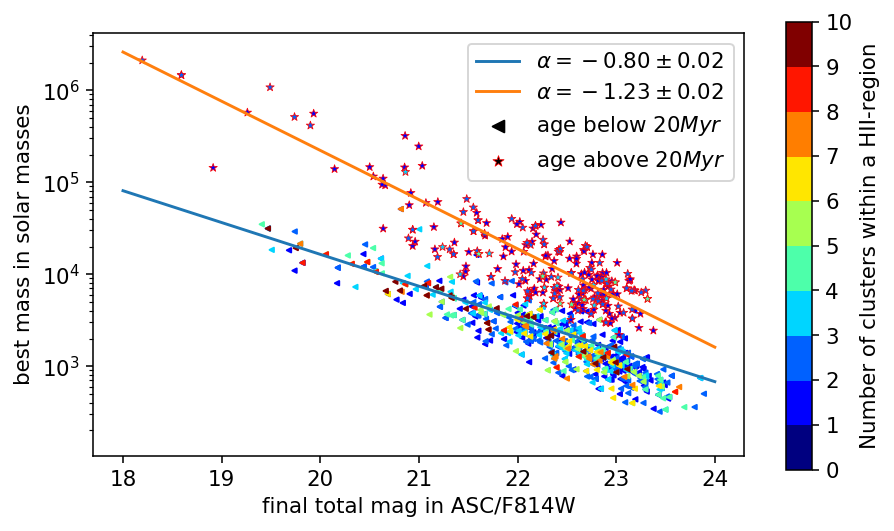

In [29]:
ages = [10e-5,20e6]
# it is interesting that the older stars seem to have an y-axis offset then correlating the IR mag against the solar masses

def exp(x, a, b):
    return a*np.exp(-b*x)

num_clusters = 10

cmap = plt.cm.jet
cmaplist = [cmap(i) for i in range(cmap.N)]
cmap = cmap.from_list('Custom cmap', cmaplist, cmap.N)
bounds = np.linspace(0,num_clusters,num_clusters+1)
norm = mpl.colors.BoundaryNorm(bounds, cmap.N)
fig, ax = plt.subplots(1,1)
for j,age in enumerate(ages):
    # first get the matches
    # here the parameters for the pruning are set
    classes_sitelle = [1,2,3,4]
    classes_legus = [1,2,3]
    if j == 0:
        max_age = 20e6#np.inf#20e6 #25e6
    else: 
        max_age = np.inf
    min_age = age#10e-5
    num_of_mag_error = 4
    # pruning fct and pruned data
    data_sitelle_p, data_legus_p, a = ba.prune_to_relevant_data(data_sitele, data_legus, num_of_mag_error, max_age, classes_sitelle, classes_legus, min_age=min_age)


    for i in range(1,num_clusters+1):
        # load which clusters are embedded within which HII-region
        dic = ba.clusters_embedded_in_HII_region(data_sitelle_p, data_legus_p, save_positional_index=True)

        # here after the legus data only countains those star clusters which are the only ones embedded within a HII-region
        data_sitele_r, data_legus_r = ba.reduce_dic_to_n_embedded(i, dic, data_sitelle_p, data_legus_p, save_positional_index=True)
        if len(data_legus_r) != 0:
            tag = [i for j in range(len(data_legus_r))]
            if j == 0:
                ax.scatter(data_legus_r[:,13], data_legus_r[:,19], s=5, c=tag, cmap=cmap, norm=norm, marker='<')
            else:
                ax.scatter(data_legus_r[:,13], data_legus_r[:,19], s=20, c=tag, cmap=cmap, norm=norm, marker='*', edgecolor='red', linewidth=0.4)
    ax.set_yscale('log')
    ax.set_xlabel('{}'.format(dir_legus_featurename_and_id[13]))
    ax.set_ylabel('{}'.format(dir_legus_featurename_and_id[19]))
    data_sitelle_p, data_legus_p, a = ba.prune_to_relevant_data(data_sitele, data_legus, num_of_mag_error, max_age, classes_sitelle, classes_legus, min_age=min_age)
    idx = data_legus_p[:,13].argsort()
    data_legus_s = data_legus_p[idx]
    popt, pcov = curve_fit(exp, data_legus_s[:,13], data_legus_s[:,19], p0=[3.16e14, 1.15], maxfev=1000)
    x = np.linspace(18, 24, 100)
    ax.plot(x, exp(x, *popt), label=r'$\alpha=-{:.2f}\pm{:.2f}$'.format(popt[1], np.sqrt(pcov[1][1])))
    
    
ax.scatter(np.inf, np.inf, c='black', label='age below $20Myr$', marker='<')
ax.scatter(np.inf, np.inf, c='black', label='age above $20Myr$', marker='*', edgecolor='red', linewidth=0.4)
ax.legend(loc='best', markerscale=6., fontsize=11)
ax2 = fig.add_axes([0.95, 0.1, 0.03, 0.8])
cb = mpl.colorbar.ColorbarBase(ax2, cmap=cmap, norm=norm, spacing='proportional', ticks=bounds, boundaries=bounds, format='%1i')
ax2.set_ylabel('Number of clusters within a HII-region')

# uncomment in order to save figure
#plt.savefig('mass_magnitude_correlation.png', dpi=200, bbox_inches='tight')
plt.show()

In [30]:
# now trying it for my data # maybe try PCA for data describing only one cluster per HII-region
# it is actually tricky to say which way of pruning is more appropriated
# since you can first only take the clusters which are the only one in an HII-region and then prune them for their other parameters
# or you can first prune them for their other parameters and therefore create new star clusters which are the only ones in the respective HII-region since not all star clusters are considered
# load which clusters are embedded within which HII-region
dic = ba.clusters_embedded_in_HII_region(data_sitele, data_legus, save_positional_index=True)

# here after the legus data only countains those star clusters which are the only ones embedded within a HII-region
data_sitele_r, data_legus_r = ba.reduce_dic_to_n_embedded(1, dic, data_sitele, data_legus, save_positional_index=True)

# first get the matches
# here the parameters for the pruning are set
classes_sitelle = [1,2,3,4]
classes_legus = [1,2,3]
max_age = 20e6
min_age = 10e-5
num_of_mag_error = 4
# pruning fct and pruned data
data_sitelle_red, data_legus_red, a = ba.prune_to_relevant_data(data_sitele_r, data_legus_r, num_of_mag_error, max_age, classes_sitelle, classes_legus, min_age=min_age)

data_sitelle_red = ba.select_pairs(data_sitelle_red, a, 0)
data_legus_red = ba.select_pairs(data_legus_red, a, 1)

# the features which the PCA should be applied to
indx_feature_sitelle = [3, 4, 6, 12, 13, 15, 18, 21, 24, 27, 30, 33, 36, 39, 42]#[3, 4, 6, 12, 13, 15, 18, 21, 24, 27, 30, 33, 36, 39, 42] #[3,4,24,36]#[]#
indx_feature_legus = []#[5, 7, 9, 11, 13,16, 19, 22, 33]#[33]#[5, 7, 9, 11, 13,16, 19, 22, 33]#[]#[5, 7, 9, 11, 13,16, 19, 22, 33]#[5, 7, 9, 11, 13, 19,22][16,19]#

# [5, 7, 9, 11, 13,16, 19, 22, 33] <-- features which were used for the analysis written in the bachelor's thesis for the LEGUS data
# [3, 4, 6, 12, 13, 15, 18, 21, 24, 27, 30, 33, 36, 39, 42] <-- features which were used for the analysis written in the bachelor's thesis for the SITELLE data

# [5, 13,16, 19, 33] <-- first try of dropping variables probably better if I use linear combination of several features according to the eigenvector
# [3, 4, 6, 12, 15, 18, 21, 30, 33, 42] <-- first try dropping variables for SITELLE 

# only use the above features and rescale them to mean 0 and unit stddev
X, mask_sitelle, mask_legus = ba.create_dataset_for_pca(data_sitelle_red, data_legus_red, indx_feature_sitelle, indx_feature_legus, scale_data=True, print_used_features=True, return_mask_of_observations=True)
X, pruning_mask = ba.create_dataset_for_pca(data_sitelle_red, data_legus_red, indx_feature_sitelle, indx_feature_legus, scale_data=True, print_used_features=False, return_pruning_mask=True)

print('len pruning mask and len datasets', np.sum(pruning_mask), len(data_sitelle_red), len(X))
data_sitelle_red_p = data_sitelle_red[pruning_mask]
data_legus_red_p = data_legus_red[pruning_mask]

shape legus (333, 35)
shape legus red (124, 35)
shape legus_red_class (67, 35)
shape sitelle (387, 45)
shape sitelle red (387, 45)
matching:  (73, 2)
legus features: ----------------
sitelle features: ----------------
Galactocentric radius
Ha total luminosity corrected for extinction
Region category
size; pc size of the regions
EBV; extinction; E(B-V)
log [NII]6583/Ha; log line ratio
log [SII]6716+6731/Ha; log line ratio
log [SII]6716+6731/[NII]6583; log line ratio
log [OIII]5007/Hb ; log line ratio
log [OII]3727/Hb ; log line ratio
log ([OII]3727+[OIII]5007)/Hb ; log line ratio
log [OIII]5007/[OII]3727 ; log line ratio
log [OIII]5007/[NII]6583 ; log line ratio
log [OII]3727/[NII]6583 ; log line ratio
[SII]6716/[SII]6731; line ratio
(73, 35) (73, 45) (51, 15)
len pruning mask and len datasets 51 73 51


C:\Users\Rapha\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:164: UserWarning: Numerical issues were encountered when centering the data and might not be solved. Dataset may contain too large values. You may need to prescale your features.
  warnings.warn("Numerical issues were encountered "


In [31]:
components = np.shape(X)[1]
print(np.shape(X))
# set up the PCA and give the number of components
pca = PCA(n_components=components, svd_solver='full')
# fit the PCA
#pca_sitelle_legus = pca.fit_transform(X)
pca_sitelle_legus = pca.fit(X)

(51, 15)


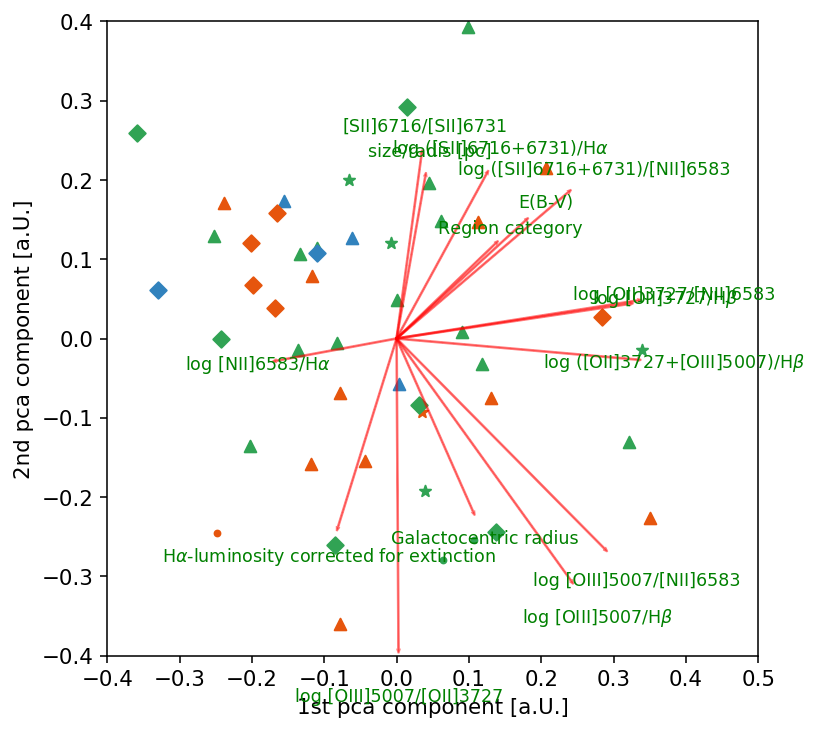

In [32]:
dir_sitelle_featurename_and_id_short_names = {0:"ID of Region", 1:"RA", 2:"DEC", 3:"Galactocentric radius", 4:r"H$\alpha$-luminosity corrected for extinction", 5:r"H$\alpha$ mean diffuse ionized gaz backgound level", 6:"Region category", 7:"I0", 8:"Amp", 9:"sig", 10:"alpha", 11:"R2", 12:"size/radis [pc]", 13:"E(B-V)", 14:"EBV_err; extinction error; E(B-V error)", 15:r"log [NII]6583/H$\alpha$", 16:"error on log [NII]6583/Ha; log line ratio error", 17:"SNR_cross [NII]6583/Ha; line ratio best SNR", 18:r"log ([SII]6716+6731)/H$\alpha$", 19:"error on log [SII]6716+6731/Ha; log line ratio error", 20:"SNR_cross [SII]6716+6731/Ha; line ratio best SNR", 21:"log ([SII]6716+6731)/[NII]6583", 22:"error on log [SII]6716+6731/[NII]6583; log line ratio error", 23:"SNR_cross on [SII]6716+6731/[NII]6583; line ratio best SNR", 24:r"log [OIII]5007/H$\beta$", 25:"error on log [OIII]5007/Hb ; log line ratio error", 26:"SNR_cross on [OIII]5007/Hb; line ratio best SNR", 27:r"log [OII]3727/H$\beta$", 28:"error on log [OII]3727/Hb ; log line ratio error", 29:"SNR_cross on [OII]3727/Hb; line ratio best SNR", 30:r"log ([OII]3727+[OIII]5007)/H$\beta$", 31:"error on log ([OII]3727+[OIII]5007)/Hb ; log line ratio error", 32:"SNR_cross on ([OII]3727+[OIII]5007)/Hb; line ratio best SNR", 33:r"log [OIII]5007/[OII]3727", 34:"error on log [OIII]5007/[OII]3727 ; log line ratio error", 35:"SNR_cross on [OIII]5007/[OII]3727; line ratio best SNR", 36:"log [OIII]5007/[NII]6583", 37:"error on log [OIII]5007/[NII]6583 ; log line ratio error", 38:"SNR_cross on [OIII]5007/[NII]6583; line ratio best SNR", 39:"log [OII]3727/[NII]6583", 40:"error on log [OII]3727/[NII}6583 ; log line ratio error", 41:"SNR_cross on [OII]3727/[NII}6583; line ratio best SNR", 42:"[SII]6716/[SII]6731", 43:"error on [SII]6716/[SII]6731; line ratio error", 44:"SNR_cross on [SII]6716/[SII]6731; line ratio best SNR"}

# get the covariance matrix
cov = pca.get_covariance()

# instead of numpy linalg also pca.components could have been used for the eigenvectors

# calculate the eigenvalues w and eigenvectors v of the covariance matrix cov
w, v = np.linalg.eig(cov)

# np.linalg.eig returns the eigenvectors of eigenvalue i in coulumn i thats why we need to transpose the eigenvectors in order to get the eigenvectors in each row to sort them in the next step
v = v.T

# sort the eigenvalues w decreasingly and the corresponding eigenvectors
idx = np.argsort(w)[::-1]
w = w[idx]
v = v[idx]

# sometimes the np.linalg.eig() returns numbers with small complex values
w = w.real
v = v.real

# get every maximal value of each eigenvector
maximum_values_row = [np.max(np.abs(v[i])) for i in range(len(v))]

def highlight_max(data, maximum_values_row=maximum_values_row, color='yellow'):
    '''
    highlight the maximum in a Series or DataFrame
    '''
    attr = 'background-color: {}'.format(color)
    return [attr if np.abs(v) in maximum_values_row else '' for v in data]

# create Ordered dictionary so it won't be sorted in the pandas dataframe
d = co.OrderedDict()

# write the first column
d['eigen value'] = w

# write the next columns (of SITELLE features)
for i in range(len(indx_feature_sitelle)):
    if mask_sitelle[i] == True:
        d[dir_sitelle_featurename_and_id_short_names[indx_feature_sitelle[i]]] = v[:,i]

# write the next coumns (of LEGUS features)
for i in range(len(indx_feature_legus)):
    if mask_legus[i] == True:
        d[dir_legus_featurename_and_id[indx_feature_legus[i]]] = v[:,i+np.sum(mask_sitelle.astype(int))]

# calculate the percentages of variance
p_of_var = [w[i]/np.sum(w) for i in range(len(w))]
# add columns to the dataframe and print variance and accumulative variance
d['percentage of total variance'] = p_of_var
d['accumulative total variance'] = [np.sum(p_of_var[:i+1]) for i in range(len(p_of_var))]

# create dataframe and display it
df = pd.DataFrame(d)

df.style.apply(highlight_max)
pd.options.display.float_format = '{:.2f}'.format
# uncomment if the table should be printed in LaTex style
#print(df.to_latex())
display(df.style.apply(highlight_max))
    
ba.creating_biplot(X, v, data_sitelle_red_p, data_legus_red_p, pca_comp_2=1, scale=True, indx_feature_sitelle=indx_feature_sitelle, indx_feature_legus=indx_feature_legus, scale_feature_vec=0.8, figsize=6, fontsize=9, dir_sitelle_featurename_and_id=dir_sitelle_featurename_and_id_short_names)
        
plt.xlim(-0.4, 0.5)
plt.ylim(-0.4,0.4)

# uncomment in order to save figure
#plt.savefig('biplot_LEGUS_SITELLE_PCA', dpi=200)
plt.show()

In [33]:
# now trying it for my data # maybe try PCA for data describing only one cluster per HII-region
# it is actually tricky to say which way of pruning is more appropriated
# since you can first only take the clusters which are the only one in an HII-region and then prune them for their other parameters
# or you can first prune them for their other parameters and therefore create new star clusters which are the only ones in the respective HII-region since not all star clusters are considered
# load which clusters are embedded within which HII-region
dic = ba.clusters_embedded_in_HII_region(data_sitele, data_legus, save_positional_index=True)

# here after the legus data only countains those star clusters which are the only ones embedded within a HII-region
data_sitele_r, data_legus_r = ba.reduce_dic_to_n_embedded(1, dic, data_sitele, data_legus, save_positional_index=True)

# first get the matches
# here the parameters for the pruning are set
classes_sitelle = [1,2,3,4]
classes_legus = [1,2,3]
max_age = 20e6
min_age = 10e-5
num_of_mag_error = 4
# pruning fct and pruned data
data_sitelle_red, data_legus_red, a = ba.prune_to_relevant_data(data_sitele_r, data_legus_r, num_of_mag_error, max_age, classes_sitelle, classes_legus, min_age=min_age)

#a = ba.create_matching_for_embedded(data_sitele, data_legus)

data_sitelle_red = ba.select_pairs(data_sitelle_red, a, 0)
data_legus_red = ba.select_pairs(data_legus_red, a, 1)

# the features which the PCA should be applied to
indx_feature_sitelle = [3, 4, 6, 12, 13, 15, 18, 21, 24, 27, 30, 33, 36, 39, 42]#[3, 4, 6, 12, 13, 15, 18, 21, 24, 27, 30, 33, 36, 39, 42] #[3,4,24,36]#[]#
indx_feature_legus = [5, 7, 9, 11, 13,16, 19, 22, 33]#[33]#[5, 7, 9, 11, 13,16, 19, 22, 33]#[]#[5, 7, 9, 11, 13,16, 19, 22, 33]#[5, 7, 9, 11, 13, 19,22][16,19]#

# [5, 7, 9, 11, 13,16, 19, 22, 33] <-- features which were used for the analysis written in the bachelor's thesis for the LEGUS data
# [3, 4, 6, 12, 13, 15, 18, 21, 24, 27, 30, 33, 36, 39, 42] <-- features which were used for the analysis written in the bachelor's thesis for the SITELLE data

# [5, 13,16, 19, 33] <-- first try of dropping variables probably better if I use linear combination of several features according to the eigenvector
# [3, 4, 6, 12, 15, 18, 21, 30, 33, 42] <-- first try dropping variables for SITELLE 

# only use the above features and rescale them to mean 0 and unit stddev
X, mask_sitelle, mask_legus = ba.create_dataset_for_pca(data_sitelle_red, data_legus_red, indx_feature_sitelle, indx_feature_legus, scale_data=True, print_used_features=True, return_mask_of_observations=True)
X, pruning_mask = ba.create_dataset_for_pca(data_sitelle_red, data_legus_red, indx_feature_sitelle, indx_feature_legus, scale_data=True, print_used_features=False, return_pruning_mask=True)

print('len pruning mask and len datasets', np.sum(pruning_mask), len(data_sitelle_red), len(X))
data_sitelle_red_p = data_sitelle_red[pruning_mask]
data_legus_red_p = data_legus_red[pruning_mask]

shape legus (333, 35)
shape legus red (124, 35)
shape legus_red_class (67, 35)
shape sitelle (387, 45)
shape sitelle red (387, 45)
matching:  (73, 2)
legus features: ----------------
final total mag in WFC3/F275W
final total mag in WFC3/F336W
final total mag in ASC/F435W
final total mag in ASC/F555W
final total mag in ASC/F814W
best age in yr
best mass in solar masses
best E(B-V)
Final assigned class
sitelle features: ----------------
Galactocentric radius
Ha total luminosity corrected for extinction
Region category
size; pc size of the regions
EBV; extinction; E(B-V)
log [NII]6583/Ha; log line ratio
log [SII]6716+6731/Ha; log line ratio
log [SII]6716+6731/[NII]6583; log line ratio
log [OIII]5007/Hb ; log line ratio
log [OII]3727/Hb ; log line ratio
log ([OII]3727+[OIII]5007)/Hb ; log line ratio
log [OIII]5007/[OII]3727 ; log line ratio
log [OIII]5007/[NII]6583 ; log line ratio
log [OII]3727/[NII]6583 ; log line ratio
[SII]6716/[SII]6731; line ratio
(73, 35) (73, 45) (47, 24)
len pruni

C:\Users\Rapha\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:164: UserWarning: Numerical issues were encountered when centering the data and might not be solved. Dataset may contain too large values. You may need to prescale your features.
  warnings.warn("Numerical issues were encountered "


In [34]:
components = np.shape(X)[1]
print(np.shape(X))
# set up the PCA and give the number of components
pca = PCA(n_components=components, svd_solver='full')
# fit the PCA
#pca_sitelle_legus = pca.fit_transform(X)
pca_sitelle_legus = pca.fit(X)

(47, 24)


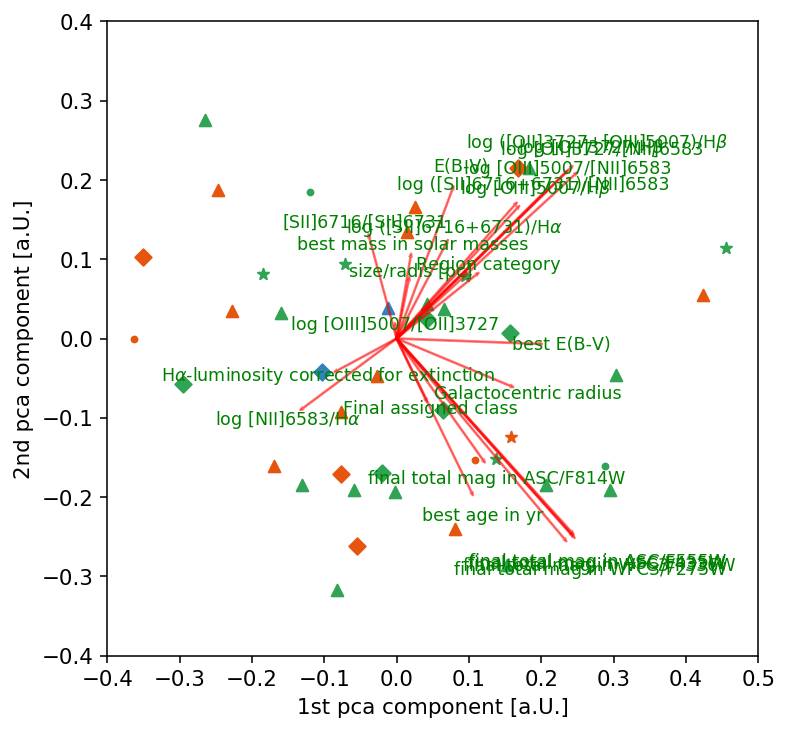

In [35]:
dir_sitelle_featurename_and_id_short_names = {0:"ID of Region", 1:"RA", 2:"DEC", 3:"Galactocentric radius", 4:r"H$\alpha$-luminosity corrected for extinction", 5:r"H$\alpha$ mean diffuse ionized gaz backgound level", 6:"Region category", 7:"I0", 8:"Amp", 9:"sig", 10:"alpha", 11:"R2", 12:"size/radis [pc]", 13:"E(B-V)", 14:"EBV_err; extinction error; E(B-V error)", 15:r"log [NII]6583/H$\alpha$", 16:"error on log [NII]6583/Ha; log line ratio error", 17:"SNR_cross [NII]6583/Ha; line ratio best SNR", 18:r"log ([SII]6716+6731)/H$\alpha$", 19:"error on log [SII]6716+6731/Ha; log line ratio error", 20:"SNR_cross [SII]6716+6731/Ha; line ratio best SNR", 21:"log ([SII]6716+6731)/[NII]6583", 22:"error on log [SII]6716+6731/[NII]6583; log line ratio error", 23:"SNR_cross on [SII]6716+6731/[NII]6583; line ratio best SNR", 24:r"log [OIII]5007/H$\beta$", 25:"error on log [OIII]5007/Hb ; log line ratio error", 26:"SNR_cross on [OIII]5007/Hb; line ratio best SNR", 27:r"log [OII]3727/H$\beta$", 28:"error on log [OII]3727/Hb ; log line ratio error", 29:"SNR_cross on [OII]3727/Hb; line ratio best SNR", 30:r"log ([OII]3727+[OIII]5007)/H$\beta$", 31:"error on log ([OII]3727+[OIII]5007)/Hb ; log line ratio error", 32:"SNR_cross on ([OII]3727+[OIII]5007)/Hb; line ratio best SNR", 33:r"log [OIII]5007/[OII]3727", 34:"error on log [OIII]5007/[OII]3727 ; log line ratio error", 35:"SNR_cross on [OIII]5007/[OII]3727; line ratio best SNR", 36:"log [OIII]5007/[NII]6583", 37:"error on log [OIII]5007/[NII]6583 ; log line ratio error", 38:"SNR_cross on [OIII]5007/[NII]6583; line ratio best SNR", 39:"log [OII]3727/[NII]6583", 40:"error on log [OII]3727/[NII}6583 ; log line ratio error", 41:"SNR_cross on [OII]3727/[NII}6583; line ratio best SNR", 42:"[SII]6716/[SII]6731", 43:"error on [SII]6716/[SII]6731; line ratio error", 44:"SNR_cross on [SII]6716/[SII]6731; line ratio best SNR"}

# get the covariance matrix
cov = pca.get_covariance()

# instead of numpy linalg also pca.components could have been used for the eigenvectors

# calculate the eigenvalues w and eigenvectors v of the covariance matrix cov
w, v = np.linalg.eig(cov)

# np.linalg.eig returns the eigenvectors of eigenvalue i in coulumn i thats why we need to transpose the eigenvectors in order to get the eigenvectors in each row to sort them in the next step
v = v.T

# sort the eigenvalues w decreasingly and the corresponding eigenvectors
idx = np.argsort(w)[::-1]
w = w[idx]
v = v[idx]

# sometimes the np.linalg.eig() returns numbers with small complex values
w = w.real
v = v.real

# get every maximal value of each eigenvector
maximum_values_row = [np.max(np.abs(v[i])) for i in range(len(v))]

def highlight_max(data, maximum_values_row=maximum_values_row, color='yellow'):
    '''
    highlight the maximum in a Series or DataFrame
    '''
    attr = 'background-color: {}'.format(color)
    return [attr if np.abs(v) in maximum_values_row else '' for v in data]

# create Ordered dictionary so it won't be sorted in the pandas dataframe
d = co.OrderedDict()

# write the first column
d['eigen value'] = w

# write the next columns (of SITELLE features)
for i in range(len(indx_feature_sitelle)):
    if mask_sitelle[i] == True:
        d[dir_sitelle_featurename_and_id_short_names[indx_feature_sitelle[i]]] = v[:,i]

# write the next coumns (of LEGUS features)
for i in range(len(indx_feature_legus)):
    if mask_legus[i] == True:
        d[dir_legus_featurename_and_id[indx_feature_legus[i]]] = v[:,i+np.sum(mask_sitelle.astype(int))]

# calculate the percentages of variance
p_of_var = [w[i]/np.sum(w) for i in range(len(w))]
# add columns to the dataframe and print variance and accumulative variance
d['percentage of total variance'] = p_of_var
d['accumulative total variance'] = [np.sum(p_of_var[:i+1]) for i in range(len(p_of_var))]

# create dataframe and display it
df = pd.DataFrame(d)

df.style.apply(highlight_max)
pd.options.display.float_format = '{:.2f}'.format
# uncomment if the table should be printed in LaTex style
#print(df.to_latex())
display(df.style.apply(highlight_max))
    
ba.creating_biplot(X, v, data_sitelle_red_p, data_legus_red_p, pca_comp_2=1, scale=True, indx_feature_sitelle=indx_feature_sitelle, indx_feature_legus=indx_feature_legus, scale_feature_vec=0.8, figsize=6, fontsize=9, dir_sitelle_featurename_and_id=dir_sitelle_featurename_and_id_short_names)
        
plt.xlim(-0.4, 0.5)
plt.ylim(-0.4,0.4)

# uncomment in order to save figure
#plt.savefig('biplot_LEGUS_SITELLE_PCA', dpi=200)
plt.show()

C:\Users\Rapha\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:164: UserWarning: Numerical issues were encountered when centering the data and might not be solved. Dataset may contain too large values. You may need to prescale your features.
  warnings.warn("Numerical issues were encountered "


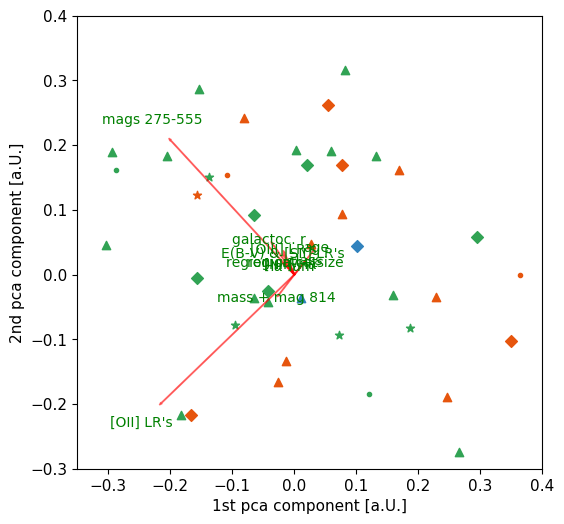

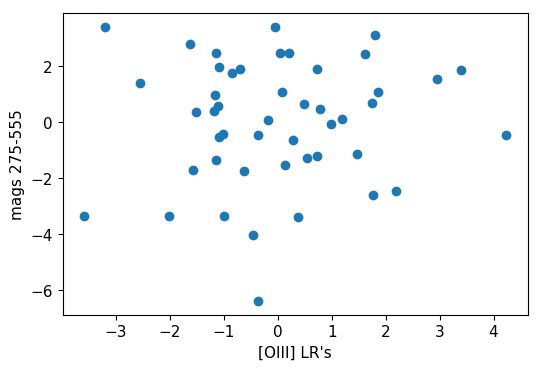

In [36]:
X_s, X_l = ba.create_super_feature_set(data_sitelle_red, data_legus_red)
X = np.append(X_s, X_l, axis=1)

components = np.shape(X)[1]
# set up the PCA and give the number of components
pca = PCA(n_components=components, svd_solver='full')
# fit the PCA
#pca_sitelle_legus = pca.fit_transform(X)
pca_sitelle_legus = pca.fit(X)

# get the covariance matrix
cov = pca.get_covariance()

# instead of numpy linalg also pca.components could have been used for the eigenvectors

# calculate the eigenvalues w and eigenvectors v of the covariance matrix cov
w, v = np.linalg.eig(cov)

# np.linalg.eig returns the eigenvectors of eigenvalue i in coulumn i thats why we need to transpose the eigenvectors in order to get the eigenvectors in each row to sort them in the next step
v = v.T

# sort the eigenvalues w decreasingly and the corresponding eigenvectors
idx = np.argsort(w)[::-1]
w = w[idx]
v = v[idx]

# sometimes the np.linalg.eig() returns numbers with small complex values
w = w.real
v = v.real

dic_SITELLE_super_feat = {0:"[OII] LR's", 1:"[OIII] LR's", 2:"E(B-V) & [SII] LR's", 3:r"[NII]/H$\alpha$", 4:"region cat", 5:"galactoc. r", 6:"region cat + size", 7:r"H$\alpha$-lum"}
dic_LEGUS_super_feat = {0:"mags 275-555", 1:"mass + mag 814", 2:"class", 3:"age"}

mpl.rcParams['figure.dpi'] = 100#80

# for the representation of the markers the given data is wrong
ba.creating_biplot(X, v, data_sitelle_red_p, data_legus_red_p, scale_feature_vec=0.3, indx_feature_sitelle=[i for i in range(8)], indx_feature_legus=[i for i in range(4)], dir_sitelle_featurename_and_id=dic_SITELLE_super_feat, dir_legus_featurename_and_id=dic_LEGUS_super_feat, figsize=6)
plt.xlim(-0.35, 0.4)
plt.ylim(-0.3, 0.4)

# uncomment in order to save figure
#plt.savefig('biplot_hyper_features', dpi=300)
plt.show()
s, l = 1, 0
plt.scatter(X_s[:,s], X_l[:,l])
plt.xlabel(dic_SITELLE_super_feat[s])
plt.ylabel(dic_LEGUS_super_feat[l])
plt.show()

C:\Users\Rapha\Anaconda3\lib\site-packages\matplotlib\figure.py:403: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


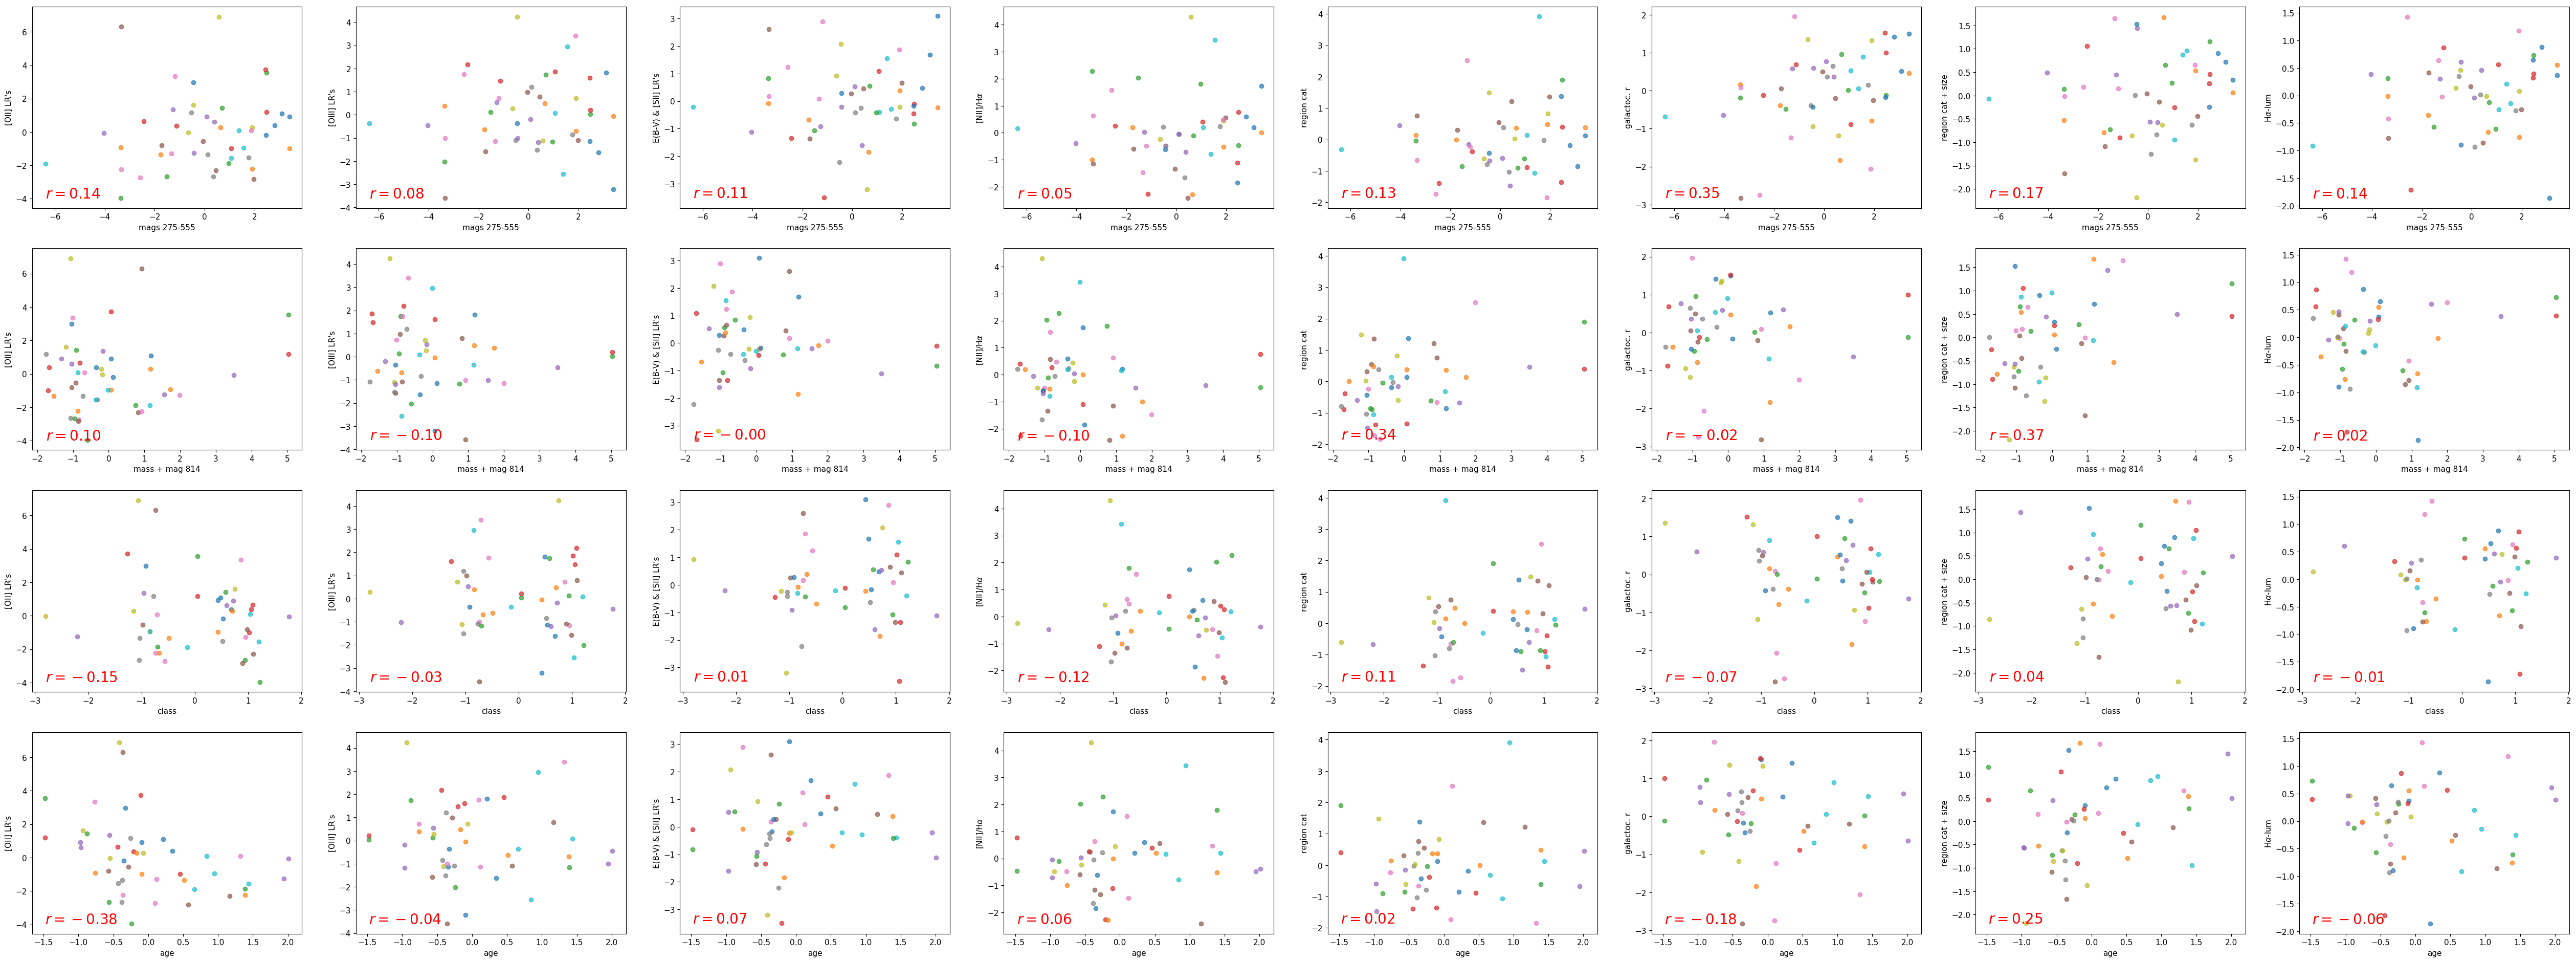

In [37]:
ba.multiplot_for_super_features(X_s, X_l, dic_SITELLE_super_feat, dic_LEGUS_super_feat, filename='super_feature_correlation', display=True)